#A) Business Background

##Business Requirement and Objective

**PinjamUang** company in US which specializes in lending various types of loans. (penyedia pinjaman)
  
The dataset contains information about past loan applicants and whether they 'defaulted' or not.

Our objective is to analyze this data in order to **identify patterns** and **group customers based on their risk profile**. By understanding which factors contribute to defaulting on a loan, we can take appropriate actions such as denying a loan, offering a reduced loan amount or lending at a higher interest rate to mitigate the risk.

####**User Dataset (spreadsheet):**
* https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/edit#gid=441866716

####**Loan (Google Drive):**
* https://drive.google.com/file/d/1ABEjY1kOP-m5rG86iiIsz6uLJ7tRYcT0/view

####**Data Dictionary:**
* https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/edit#gid=848427739

#B) Data Preparation

## Import Library

In [144]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

## Import Dataset

### Users (Spreadsheet)

In [145]:
#Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/edit#gid=441866716'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

print(sheet_url_replace) #To show the link to csv

df_users_og = pd.read_csv(sheet_url_replace) #to load/read the csv into pandas dataframe
df_users_og.head(10) #Show only first 5 rows (To see how the dataset lookslike without)

https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/export?format=csv&gid=441866716


,id,emp_title,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,address,state_code,region,grade
0,148271,sales,2 years,45000.000,34.190,Not Verified,MORTGAGEX,"002 Taylor Divide\nMichellefurt, KY 30723",KY,South,B
1,218833,Palm Beach Cardiology,3 years,80000.000,22.430,Not Verified,MORTGAGEE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
2,218833,Palm Beach Cardiology,3 years,80000.000,22.430,Not Verified,MORTGAGEE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
3,383111,Truck Dealership,3 years,50150.000,10.240,Not Verified,MORTGAGE,"00404 Ian Drive\nChrismouth, NE 70466",NE,Midwest,A
4,258042,NaN,NaN,31600.000,12.000,Verified,MORTGAGE,"9835 Oneal Mountain\nSouth Joseph, DC 11650",DC,South,B
5,258042,NaN,NaN,31600.000,12.000,Verified,MORTGAGE,"9835 Oneal Mountain\nSouth Joseph, DC 11650",DC,South,B
6,167468,Director of Facillities,8 years,79000.000,14.640,Verified,MORTGAGE,"3300 Laura Hill\nGrahamfurt, OR 70466",OR,West,A
7,337956,technician,< 1 year,60000.000,25.420,Source Verified,RENTA,"4691 Scott Vista\nWest Rita, WA 22690",WA,West,C
8,316379,General Manager,< 1 year,100000.000,18.920,Source Verified,MORTGAGE,"292 Dana Dam\nQuinnville, TX 22690",TX,South,A
9,268875,Head of business development,2 years,100000.000,19.790,Not Verified,MORTGAGE,"944 Vargas Plains\nTinaland, TN 30723",TN,South,A


In [146]:
df_users_og.head(10) #Show only first 5 rows (To see how the dataset lookslike without)

,id,emp_title,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,address,state_code,region,grade
0,148271,sales,2 years,45000.000,34.190,Not Verified,MORTGAGEX,"002 Taylor Divide\nMichellefurt, KY 30723",KY,South,B
1,218833,Palm Beach Cardiology,3 years,80000.000,22.430,Not Verified,MORTGAGEE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
2,218833,Palm Beach Cardiology,3 years,80000.000,22.430,Not Verified,MORTGAGEE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
3,383111,Truck Dealership,3 years,50150.000,10.240,Not Verified,MORTGAGE,"00404 Ian Drive\nChrismouth, NE 70466",NE,Midwest,A
4,258042,NaN,NaN,31600.000,12.000,Verified,MORTGAGE,"9835 Oneal Mountain\nSouth Joseph, DC 11650",DC,South,B
5,258042,NaN,NaN,31600.000,12.000,Verified,MORTGAGE,"9835 Oneal Mountain\nSouth Joseph, DC 11650",DC,South,B
6,167468,Director of Facillities,8 years,79000.000,14.640,Verified,MORTGAGE,"3300 Laura Hill\nGrahamfurt, OR 70466",OR,West,A
7,337956,technician,< 1 year,60000.000,25.420,Source Verified,RENTA,"4691 Scott Vista\nWest Rita, WA 22690",WA,West,C
8,316379,General Manager,< 1 year,100000.000,18.920,Source Verified,MORTGAGE,"292 Dana Dam\nQuinnville, TX 22690",TX,South,A
9,268875,Head of business development,2 years,100000.000,19.790,Not Verified,MORTGAGE,"944 Vargas Plains\nTinaland, TN 30723",TN,South,A


### Loan (Google Drive)

In [147]:
#Import dataset csv format from google drive
sheet_url = 'https://drive.google.com/file/d/1ABEjY1kOP-m5rG86iiIsz6uLJ7tRYcT0/view' #assign link to a variable
sheet_url_replace = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2] #replace the link

print(sheet_url_replace)

df_loan_og = pd.read_csv(sheet_url_replace) #Import/read the csv file into pandas dataframe
df_loan_og.head()

https://drive.google.com/uc?id=1ABEjY1kOP-m5rG86iiIsz6uLJ7tRYcT0


,id,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,Fully Paid,credit_card,INDIVIDUAL,Aug-2015,36 months,2000.000,69.930,15.610
1,218833,Fully Paid,credit_card,INDIVIDUAL,Apr-2010,36 months,15000.000,506.180,13.110
2,383111,Fully Paid,debt_consolidation,INDIVIDUAL,Jun-2013,36 months,10000.000,328.060,11.140
3,258042,Charged Off,debt_consolidation,INDIVIDUAL,Oct-2014,36 months,8750.000,308.880,16.290
4,167468,Fully Paid,credit_card,INDIVIDUAL,Jan-2014,36 months,12000.000,398.520,11.990


**Data Dictionary :**
* **id** = unique identifier of borrower
* **loan_status**	= current status of the loan (Fully Paid = Lunas ; Charged-Off = Gagal Bayar)
* **purpose**	= For what purpose the loan is used. See loan purpose table on the right for each definition
* **application_type**	= Whether the loan is an individual application or not. See application type table on the right for each definition
* **issue_month**	= the month which the loan application is issued
* **term**	= The number of payment on the loan, values are in months
* **loan_amount**	= the amount of loan applied by the borrower
* **installment** =	monthly payment on the loan by the borrower
* **int_rate**	= Interest rate on the loan

#C) Data Cleaning

Steps to do :
* Unique Values (Remove irrelevant values)
* Treating missing values (state the reasoning)
* Outliers (in loan_amount & annual_income using IQR)
* Check Duplicates, retain only the first record
* Check data & convert data types
* Check typos
* Check time series data
* Merge the dataset

### Users

In [148]:
#Make a copy of the original data for data cleaning
df_users_dc = df_users_og.copy()

In [149]:
df_users_dc.head() #Showing 5 data records

,id,emp_title,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,address,state_code,region,grade
0,148271,sales,2 years,45000.000,34.190,Not Verified,MORTGAGEX,"002 Taylor Divide\nMichellefurt, KY 30723",KY,South,B
1,218833,Palm Beach Cardiology,3 years,80000.000,22.430,Not Verified,MORTGAGEE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
2,218833,Palm Beach Cardiology,3 years,80000.000,22.430,Not Verified,MORTGAGEE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
3,383111,Truck Dealership,3 years,50150.000,10.240,Not Verified,MORTGAGE,"00404 Ian Drive\nChrismouth, NE 70466",NE,Midwest,A
4,258042,NaN,NaN,31600.000,12.000,Verified,MORTGAGE,"9835 Oneal Mountain\nSouth Joseph, DC 11650",DC,South,B


####Check Data Type

In [150]:
df_users_dc.shape #Check how much column and rows

(10007, 11)

In [151]:
df_users_dc.info() #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10007 non-null  int64  
 1   emp_title             9376 non-null   object 
 2   emp_length            9495 non-null   object 
 3   annual_inc            10007 non-null  float64
 4   income_expense_ratio  10007 non-null  float64
 5   verification_status   10007 non-null  object 
 6   home_ownership        10007 non-null  object 
 7   address               10007 non-null  object 
 8   state_code            10007 non-null  object 
 9   region                8931 non-null   object 
 10  grade                 10007 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 860.1+ KB


In [152]:
df_users_dc.isnull().sum() #Check how much null values exist

id                         0
emp_title                631
emp_length               512
annual_inc                 0
income_expense_ratio       0
verification_status        0
home_ownership             0
address                    0
state_code                 0
region                  1076
grade                      0
dtype: int64

Insight :
* id can be changed into string (For data type convertion demo purposes)
* emp_title, 631 row null
* emp_length, 512 row null
* region, 1076 row null

We will change the id data type from int into string

In [153]:
df_users_dc['id'] = df_users_dc['id'].astype(str)   #Change id data type into string

In [154]:
df_users_dc['id'].dtype #Check the datatype of id after replaced

dtype('O')

O stands for object, the data succesfult converted into string

#### Check for values and Typo



In [155]:
df_users_dc.columns

Index(['id', 'emp_title', 'emp_length', 'annual_inc', 'income_expense_ratio',
       'verification_status', 'home_ownership', 'address', 'state_code',
       'region', 'grade'],
      dtype='object')

In [156]:
#Checking the values for emp_title
# df.value_counts()
# df.columns[1]
# df_users_dc[df_users_dc.columns[1]].value_counts()
df_users_dc['emp_title'].value_counts()

Manager                       115
Teacher                        95
Owner                          51
Supervisor                     51
Registered Nurse               46
                             ... 
Meat Manager                    1
floor hand                      1
Sr Case Manager                 1
Underwriter/Credit Analyst      1
QC                              1
Name: emp_title, Length: 6780, dtype: int64

Recommendation :

 2 Option :
  1. Just remove the data (column) since it's so diverse
  2. Make a new category

Here we just exclude the column

In [157]:
#Checking the values for emp_length
df_users_dc[df_users_dc.columns[2]].value_counts()

10+ years    3166
2 years       885
3 years       811
< 1 year      805
5 years       668
1 year        650
4 years       587
7 years       550
6 years       506
8 years       492
9 years       375
Name: emp_length, dtype: int64

Recommendation :
* Can be made into bin
* or a new category

In [158]:
#Checking the values for verification_status
df_users_dc[df_users_dc.columns[5]].value_counts()

Verified           3632
Source Verified    3449
Not Verified       2926
Name: verification_status, dtype: int64

Notes :
* Explanation can be seen on the data dictionary

Recommendation :
* Check to stakeholder whether verified and source verified is considered the same
  * It is not, because all of it is defined in the data dictionary

In [159]:
#Checking the values for home_ownership
df_users_dc[df_users_dc.columns[6]].value_counts()    #Check count of every unique values

MORTGAGE     4862
RENT         4146
OWN           988
RENTA           4
OWNN            3
MORTGAGEE       2
MORTGAGEX       1
OTHER           1
Name: home_ownership, dtype: int64

Insight :
* We need to check on "OTHER", since its only 1
* There are multiple typo

Recommendation
* Clean the typo
* Since "other" only 1 data we can delete it

In [160]:
# #Fix typos into only 'MORTGAGE','OWN' and 'RENT'
df_users_dc['home_ownership'].replace(["MORTGAGEE","MORTGAGEX"],'MORTGAGE', inplace = True)
df_users_dc['home_ownership'].replace("OWNN","OWN", inplace = True)
df_users_dc['home_ownership'].replace("RENTA","RENT", inplace = True)

# df_users_dc['home_ownership'].replace({"MORTGAGEE":'MORTGAGE',
#                                          "MORTGAGEX":'MORTGAGE',
#                                          "OWNN":"OWN",
#                                          "RENTA":"RENT"}, inplace = True)

In [161]:
df_users_dc['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [162]:
#Exclude OTHER (other way to drop/exclude values)
df_users_dc = df_users_dc[df_users_dc['home_ownership']!="OTHER"]

In [163]:
#To confirm the changes after fixing the typos
df_users_dc['home_ownership'].value_counts()

MORTGAGE    4865
RENT        4150
OWN          991
Name: home_ownership, dtype: int64

In [164]:
#Check address unique values
df_users_dc[df_users_dc.columns[7]].value_counts()

083 Sarah Run Suite 526\nPerezmouth, WY 22690          2
USCGC Miller\nFPO AP 22690                             2
978 Jacqueline Shoals\nDawnside, WY 22690              2
24810 Morales Walk Suite 193\nNew Chad, SD 93700       2
106 Steven Ranch Apt. 143\nMannside, NC 48052          2
                                                      ..
8498 Pearson Locks Apt. 414\nWest Jessica, LA 29597    1
PSC 5797, Box 8672\nAPO AP 70466                       1
PSC 9290, Box 0343\nAPO AA 22690                       1
7770 Burke Plain Apt. 784\nSouth Kayla, WV 70466       1
1863 Shaw Bridge Apt. 661\nHardinhaven, KY 93700       1
Name: address, Length: 9998, dtype: int64

In [165]:
#Check state_code unique values
df_users_dc[df_users_dc.columns[8]].value_counts()

AP    366
AA    356
AE    354
AR    197
WA    195
LA    193
TN    193
ME    188
MI    188
MT    188
HI    186
MN    186
MS    186
SC    185
NH    185
OK    185
WI    185
TX    182
DC    181
MD    181
AL    180
IA    180
IL    179
NV    178
MO    178
NY    177
KS    177
DE    177
AZ    176
ID    176
VT    175
WY    173
MA    173
VA    173
NJ    172
ND    172
OR    171
CT    171
PA    170
CA    169
GA    169
CO    167
IN    167
NE    167
SD    165
WV    165
RI    164
FL    164
NM    161
AK    159
KY    159
NC    156
OH    151
UT    135
Name: state_code, dtype: int64

In [166]:
#Check for region unique values
df_users_dc[df_users_dc.columns[9]].value_counts()

South        3026
West         2234
Midwest      2095
Northeast    1575
Name: region, dtype: int64

In [167]:
#Check for grade unique values
df_users_dc[df_users_dc.columns[10]].value_counts()

B    4528
A    3972
C    1506
Name: grade, dtype: int64

#### Treat Missing & Irrelevant Values

In [168]:
df_users_dc.columns

Index(['id', 'emp_title', 'emp_length', 'annual_inc', 'income_expense_ratio',
       'verification_status', 'home_ownership', 'address', 'state_code',
       'region', 'grade'],
      dtype='object')

**Missing Values in emp_title**

Since the data are so diverse, and it is a free to fill form, this is most probably cannot be used, so we will delete this column.

In [169]:
df_users_dc.drop(columns = 'emp_title', inplace = True) #Drop the emp_title

In [170]:
df_users_dc.columns #Confirm the dropped data by looking at the columns

Index(['id', 'emp_length', 'annual_inc', 'income_expense_ratio',
       'verification_status', 'home_ownership', 'address', 'state_code',
       'region', 'grade'],
      dtype='object')

The emp_title is successfuly dropped

**Missing Values in emp_length**

Since we want to make this into a bin, we can remove the null value since this can interfere our analysis.

In [171]:
df_users_dc = df_users_dc[~df_users_dc['emp_length'].isna()] #Exclude all null data
df_users_dc

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,address,state_code,region,grade
0,148271,2 years,45000.000,34.190,Not Verified,MORTGAGE,"002 Taylor Divide\nMichellefurt, KY 30723",KY,South,B
1,218833,3 years,80000.000,22.430,Not Verified,MORTGAGE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
2,218833,3 years,80000.000,22.430,Not Verified,MORTGAGE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
3,383111,3 years,50150.000,10.240,Not Verified,MORTGAGE,"00404 Ian Drive\nChrismouth, NE 70466",NE,Midwest,A
6,167468,8 years,79000.000,14.640,Verified,MORTGAGE,"3300 Laura Hill\nGrahamfurt, OR 70466",OR,West,A
...,...,...,...,...,...,...,...,...,...,...
10002,385122,4 years,105000.000,4.890,Verified,MORTGAGE,"508 Shannon Canyon Suite 984\nPort Julia, NC 11650",NC,South,C
10003,277410,10+ years,111000.000,22.290,Not Verified,MORTGAGE,"978 Jacqueline Shoals\nDawnside, WY 22690",WY,West,B
10004,132276,9 years,65000.000,10.470,Not Verified,MORTGAGE,"083 Sarah Run Suite 526\nPerezmouth, WY 22690",WY,West,B
10005,282878,1 year,35000.000,18.960,Verified,RENT,"24810 Morales Walk Suite 193\nNew Chad, SD 93700",SD,Midwest,B


In [172]:
#Confirm whether null data still exist
df_users_dc.isna().sum()

id                         0
emp_length                 0
annual_inc                 0
income_expense_ratio       0
verification_status        0
home_ownership             0
address                    0
state_code                 0
region                  1016
grade                      0
dtype: int64

**Irrelevant column "address"**

We are going to delete it since it too diverse

In [173]:
df_users_dc.drop(columns = 'address', inplace = True) #Drop address columns

<ipython-input-173-818ba6dba7d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_dc.drop(columns = 'address', inplace = True) #Drop address columns


In [174]:
df_users_dc.columns #Confirm whether the column is dropped

Index(['id', 'emp_length', 'annual_inc', 'income_expense_ratio',
       'verification_status', 'home_ownership', 'state_code', 'region',
       'grade'],
      dtype='object')

**Missing Values in Region**

Option :
  We can change it based on the state code, or just change it to unknown

Here we change the data into unknown

In [175]:
df_users_dc['region'].fillna("unknown",inplace = True)

#Then we confirm the data after fill the null values
df_users_dc.isna().sum()

<ipython-input-175-756ce45629ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_dc['region'].fillna("unknown",inplace = True)


id                      0
emp_length              0
annual_inc              0
income_expense_ratio    0
verification_status     0
home_ownership          0
state_code              0
region                  0
grade                   0
dtype: int64

To make sure we need to see what is the unknown region related to with the state code

In [176]:
pd.set_option("display.max_colwidth", 100) #display col width to 100 char
regions_statecode = df_users_dc.groupby(['region'])['state_code'].unique() #Group by region, and state_code unique values
regions_statecode


region
Midwest                          [ND, NE, MO, IN, IL, WI, MN, OH, MI, SD, KS, IA]
Northeast                                    [CT, RI, NY, NJ, VT, ME, PA, MA, NH]
South        [KY, TX, TN, MS, GA, VA, MD, NC, FL, DC, AR, OK, AL, SC, LA, WV, DE]
West                         [OR, WA, UT, ID, AK, MT, AZ, WY, CA, HI, NV, CO, NM]
unknown                                                              [AE, AA, AP]
Name: state_code, dtype: object

When we see by region, the unknown region are consist of AE, AA and AP which are part of US military region :
* AE for U.S. Armed Forces – Europe,
* AA for U.S. Armed Forces – Americas,
* AP for U.S. Armed Forces – Pacific

Source : https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations

By looking at this we know that the unknown are listed, but is not actually in us

Since we just want to analyze the user currently in the us, we are going to exclude the unknown region.

In [177]:
df_users_dc = df_users_dc[df_users_dc['region'] != 'unknown']  #Exclude the unknown values

df_users_dc['region'].value_counts()  #To confirm the deletion is successful

South        2883
West         2118
Midwest      1992
Northeast    1485
Name: region, dtype: int64

In [178]:
df_users_dc.shape   #Check the data we have

(8478, 9)

Insight :
* All null's has been treated
* There is no typo


####Data Manipulation

Creating a bin for the emp_length

In [179]:
df_users_dc['emp_length'].value_counts()    #Check the unique values and the counts

10+ years    2810
2 years       798
< 1 year      723
3 years       717
5 years       605
1 year        574
4 years       518
7 years       490
6 years       462
8 years       442
9 years       339
Name: emp_length, dtype: int64

In [180]:
a = df_users_dc['emp_length']   #To make it easier to assign the data into the bin / category we assign the column into a variable

In [181]:
#Here we also decided to assign it into different column
#loc[row,column]
df_users_dc.loc[(a == '< 1 year') | (a == '1 year') | (a=='2 years'), 'emp_experience'] = 'rookies'
df_users_dc.loc[(a == '3 years') | (a == '4 years') | (a=='5 years') | (a=='6 years'), 'emp_experience'] = 'Mid-Level'
df_users_dc.loc[(a == '7 years') | (a == '8 years') | (a=='9 years') | (a=='10+ years'), 'emp_experience'] = 'Senior'

<ipython-input-181-03f65a588c87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_dc.loc[(a == '< 1 year') | (a == '1 year') | (a=='2 years'), 'emp_experience'] = 'rookies'


In [182]:
df_users_dc['emp_experience'].value_counts()    #To confirm the data after we create the categories

Senior       4081
Mid-Level    2302
rookies      2095
Name: emp_experience, dtype: int64

In [183]:
df_users_dc.shape

(8478, 10)

####Check Duplicates

In [184]:
#Check the duplicate
df_users_dc[df_users_dc['id'].duplicated()]

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience
2,218833,3 years,80000.000,22.430,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level
10002,385122,4 years,105000.000,4.890,Verified,MORTGAGE,NC,South,C,Mid-Level
10003,277410,10+ years,111000.000,22.290,Not Verified,MORTGAGE,WY,West,B,Senior
10004,132276,9 years,65000.000,10.470,Not Verified,MORTGAGE,WY,West,B,Senior
10005,282878,1 year,35000.000,18.960,Verified,RENT,SD,Midwest,B,rookies
10006,276032,10+ years,104500.000,21.450,Verified,MORTGAGE,NC,South,B,Senior


It is showing that duplicate data are exist, so we need to remove it based on the id since 1 id in user should be only 1 per id.

In [185]:
#Exclude the duplicate
df_users_dc.drop_duplicates('id',keep = 'first',inplace = True)

# Cara lain:
# df_users_dc = df_users_dc[~df_users_dc['id'].duplicated()]
# # df_users_dc[df_users_dc['id']==218833]
df_users_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8472 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8472 non-null   object 
 1   emp_length            8472 non-null   object 
 2   annual_inc            8472 non-null   float64
 3   income_expense_ratio  8472 non-null   float64
 4   verification_status   8472 non-null   object 
 5   home_ownership        8472 non-null   object 
 6   state_code            8472 non-null   object 
 7   region                8472 non-null   object 
 8   grade                 8472 non-null   object 
 9   emp_experience        8472 non-null   object 
dtypes: float64(2), object(8)
memory usage: 728.1+ KB


<ipython-input-185-61997ff464b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_dc.drop_duplicates('id',keep = 'first',inplace = True)


From previous step we have removed 6 duplicate.

#### Users Clean Data

In [186]:
df_users = df_users_dc.copy() #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_users.head()

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience
0,148271,2 years,45000.000,34.190,Not Verified,MORTGAGE,KY,South,B,rookies
1,218833,3 years,80000.000,22.430,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level
3,383111,3 years,50150.000,10.240,Not Verified,MORTGAGE,NE,Midwest,A,Mid-Level
6,167468,8 years,79000.000,14.640,Verified,MORTGAGE,OR,West,A,Senior
7,337956,< 1 year,60000.000,25.420,Source Verified,RENT,WA,West,C,rookies


In [187]:
df_users.info()   #For summary after data cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8472 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8472 non-null   object 
 1   emp_length            8472 non-null   object 
 2   annual_inc            8472 non-null   float64
 3   income_expense_ratio  8472 non-null   float64
 4   verification_status   8472 non-null   object 
 5   home_ownership        8472 non-null   object 
 6   state_code            8472 non-null   object 
 7   region                8472 non-null   object 
 8   grade                 8472 non-null   object 
 9   emp_experience        8472 non-null   object 
dtypes: float64(2), object(8)
memory usage: 728.1+ KB


### Loan

In [188]:
df_loan_dc = df_loan_og.copy()  #Create a copy of original data

In [189]:
df_loan_dc.head()   #To check the snippet of the data

,id,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,Fully Paid,credit_card,INDIVIDUAL,Aug-2015,36 months,2000.000,69.930,15.610
1,218833,Fully Paid,credit_card,INDIVIDUAL,Apr-2010,36 months,15000.000,506.180,13.110
2,383111,Fully Paid,debt_consolidation,INDIVIDUAL,Jun-2013,36 months,10000.000,328.060,11.140
3,258042,Charged Off,debt_consolidation,INDIVIDUAL,Oct-2014,36 months,8750.000,308.880,16.290
4,167468,Fully Paid,credit_card,INDIVIDUAL,Jan-2014,36 months,12000.000,398.520,11.990


####Check Data Type

In [190]:
df_loan_dc.shape    #Check how much column and rows

(10000, 9)

In [191]:
df_loan_dc.info()   #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   loan_status       10000 non-null  object 
 2   purpose           10000 non-null  object 
 3   application_type  10000 non-null  object 
 4   issue_month       10000 non-null  object 
 5   term              10000 non-null  object 
 6   loan_amnt         10000 non-null  float64
 7   installment       10000 non-null  float64
 8   int_rate          10000 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 703.2+ KB


Insight :
* id can be changed into string
* Issue month we can split the month and the year
* term we can show only the number of the month

Change issue month into date

In [192]:
#To convert the issue_month into datetime data type

df_loan_dc['issue_month'] = pd.to_datetime(df_loan_dc['issue_month'])
df_loan_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10000 non-null  int64         
 1   loan_status       10000 non-null  object        
 2   purpose           10000 non-null  object        
 3   application_type  10000 non-null  object        
 4   issue_month       10000 non-null  datetime64[ns]
 5   term              10000 non-null  object        
 6   loan_amnt         10000 non-null  float64       
 7   installment       10000 non-null  float64       
 8   int_rate          10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 703.2+ KB


Change the id type from int into string

In [193]:
#Change the id data type into string
df_loan_dc['id'] = df_loan_dc['id'].astype(str)

In [194]:
df_loan_dc.info()   #Check data info to confirm changing data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10000 non-null  object        
 1   loan_status       10000 non-null  object        
 2   purpose           10000 non-null  object        
 3   application_type  10000 non-null  object        
 4   issue_month       10000 non-null  datetime64[ns]
 5   term              10000 non-null  object        
 6   loan_amnt         10000 non-null  float64       
 7   installment       10000 non-null  float64       
 8   int_rate          10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 703.2+ KB


 #### Check for values and Typo

In [195]:
#Checking the values for loan_status
df_loan_dc[df_loan_dc.columns[1]].value_counts()

Fully Paid     6063
Charged Off    3937
Name: loan_status, dtype: int64

There are the loan description that listed on the data dictionary, if it not here we need to remove it
* **car** =	to buy a car
* **credit_card**	= to pay credit card bill
* **debt_consolidation**	= to merge all debts into a new single debt with lower interest rate and one installment instead of separate installment
* **educational** =	to pay for education
* **home_improvement** = to pay for home improvement bill
* **house**	= to buy a house
* **major_purchase** = refers to a large expense that an individual or business is planning to make (Investing in a business or franchise or purchasing large equipment or machinery)
* **medical**	= to pay medical bill
* **moving**	= to pay for moving/relocation expenses
* **other**	= to pay for unspecified things
* **renewable_energy**	= to pay for renewable energy
* **small_business** = to pay for small_business related bill
* **vacation** = to pay for vacation
* **wedding** = to pay for wedding reception party

In [196]:
#Checking the values for purpose
df_loan_dc[df_loan_dc.columns[2]].value_counts()

debt_consolidation    6054
credit_card           2007
home_improvement       555
other                  551
major_purchase         214
small_business         158
medical                111
moving                  85
car                     82
house                   69
vacation                67
wedding                 36
renewable_energy         7
educational              4
Name: purpose, dtype: int64

All data are listed on the data dictionary, so we are going to keep all values

**Application_type Data Dictionary :**
* **Direct Pay** =	recurring payment that is automatically deducted monthly
* **Individual** =	Individual loan applicant
* **Joint** =	More than 1 individual applicants

In [197]:
#Checking the values for application_type
df_loan_dc[df_loan_dc.columns[3]].value_counts()

INDIVIDUAL    9983
JOINT           10
DIRECT_PAY       7
Name: application_type, dtype: int64

Insight :
  * The most common application type is INDIVIDUAL, it is prefered by 99.83% of the total loan data

In [198]:
#Checking the values for term
df_loan_dc[df_loan_dc.columns[5]].value_counts()

 36 months    7225
 60 months    2775
Name: term, dtype: int64

Insight :
* Most people prefer to choose 36 loan term by 72.25% of the total loan data

#### Treat Missing Values

In [199]:
df_loan_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10000 non-null  object        
 1   loan_status       10000 non-null  object        
 2   purpose           10000 non-null  object        
 3   application_type  10000 non-null  object        
 4   issue_month       10000 non-null  datetime64[ns]
 5   term              10000 non-null  object        
 6   loan_amnt         10000 non-null  float64       
 7   installment       10000 non-null  float64       
 8   int_rate          10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 703.2+ KB


There are no missing values detected

#### Check Duplicates

In [200]:
#Check the duplicate
df_loan_dc[df_loan_dc['id'].duplicated()]

,id,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate


There is no duplicated data

#### Loan Clean Data

In [201]:
df_loan = df_loan_dc.copy()  #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_loan.head()

,id,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,Fully Paid,credit_card,INDIVIDUAL,2015-08-01,36 months,2000.000,69.930,15.610
1,218833,Fully Paid,credit_card,INDIVIDUAL,2010-04-01,36 months,15000.000,506.180,13.110
2,383111,Fully Paid,debt_consolidation,INDIVIDUAL,2013-06-01,36 months,10000.000,328.060,11.140
3,258042,Charged Off,debt_consolidation,INDIVIDUAL,2014-10-01,36 months,8750.000,308.880,16.290
4,167468,Fully Paid,credit_card,INDIVIDUAL,2014-01-01,36 months,12000.000,398.520,11.990


In [202]:
df_loan.info() #For summary after data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10000 non-null  object        
 1   loan_status       10000 non-null  object        
 2   purpose           10000 non-null  object        
 3   application_type  10000 non-null  object        
 4   issue_month       10000 non-null  datetime64[ns]
 5   term              10000 non-null  object        
 6   loan_amnt         10000 non-null  float64       
 7   installment       10000 non-null  float64       
 8   int_rate          10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 703.2+ KB


## Merge Data

In [203]:
#Merge the table
#Since we want to analyze the user and the loan, it is feels right to have both data available and none of them are null
#Thats why we use inner join
df_merged = df_users.merge(df_loan, how='inner', left_on =['id'], right_on = ['id'])
df_merged.head()

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,2 years,45000.000,34.190,Not Verified,MORTGAGE,KY,South,B,rookies,Fully Paid,credit_card,INDIVIDUAL,2015-08-01,36 months,2000.000,69.930,15.610
1,218833,3 years,80000.000,22.430,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level,Fully Paid,credit_card,INDIVIDUAL,2010-04-01,36 months,15000.000,506.180,13.110
2,383111,3 years,50150.000,10.240,Not Verified,MORTGAGE,NE,Midwest,A,Mid-Level,Fully Paid,debt_consolidation,INDIVIDUAL,2013-06-01,36 months,10000.000,328.060,11.140
3,167468,8 years,79000.000,14.640,Verified,MORTGAGE,OR,West,A,Senior,Fully Paid,credit_card,INDIVIDUAL,2014-01-01,36 months,12000.000,398.520,11.990
4,337956,< 1 year,60000.000,25.420,Source Verified,RENT,WA,West,C,rookies,Charged Off,debt_consolidation,INDIVIDUAL,2015-04-01,60 months,22750.000,596.680,19.520


In [204]:
df_merged.info() #To summary the data cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8472 entries, 0 to 8471
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8472 non-null   object        
 1   emp_length            8472 non-null   object        
 2   annual_inc            8472 non-null   float64       
 3   income_expense_ratio  8472 non-null   float64       
 4   verification_status   8472 non-null   object        
 5   home_ownership        8472 non-null   object        
 6   state_code            8472 non-null   object        
 7   region                8472 non-null   object        
 8   grade                 8472 non-null   object        
 9   emp_experience        8472 non-null   object        
 10  loan_status           8472 non-null   object        
 11  purpose               8472 non-null   object        
 12  application_type      8472 non-null   object        
 13  issue_month       

## Checking Outlier in Annual Income

<Axes: xlabel='annual_inc'>

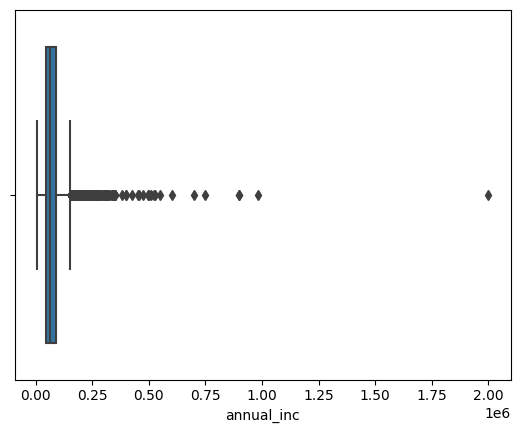

In [205]:
#Cheking the data distribution of the df_merged data for annual_inc
sns.boxplot(data = df_merged , x ="annual_inc")

We can see there is not outlier for the lower bound, but there is a lot of outlier detected based on the upper bound, which by looking with bare eye, the upper limit is around 150 thousand.

<Axes: xlabel='loan_amnt'>

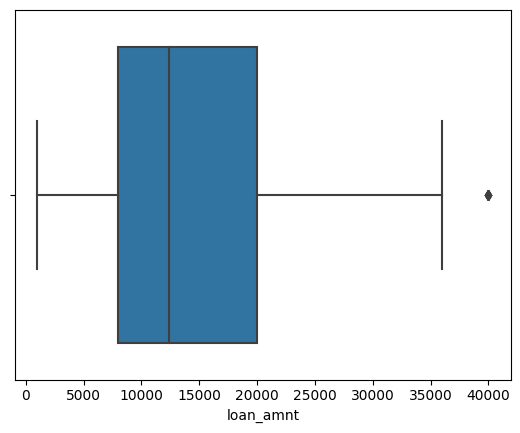

In [206]:
#Cheking the data distribution of the df_merged data for loan_amnt
sns.boxplot(data = df_merged , x ="loan_amnt")

For the loan_amount no outlier for the lower bound, not much outlier, on the upper bound. It probably around 40000.

In [207]:
#Check the Q1,Q3,IQR,UB & LB
#ainc = annual income
print('Outlier Detection "annual_inc":\n')
ainc_Q1 = df_merged["annual_inc"].quantile(0.25)
print("Q1 =",ainc_Q1)

ainc_Q3 = df_merged["annual_inc"].quantile(0.75)
print("Q3 =",ainc_Q3)

ainc_IQR = ainc_Q3 - ainc_Q1
print("IQR =",ainc_IQR)

ainc_LB = ainc_Q1-1.5*ainc_IQR
print("LB =",ainc_LB)

ainc_UB = ainc_Q3+1.5*ainc_IQR
print("UB =",ainc_UB)

#------------------------------------------
#lamnt = loan amount
print('Outlier Detection "loan_amnt":\n')
lamnt_Q1 = df_merged["loan_amnt"].quantile(0.25)
print("Q1 =",lamnt_Q1)

lamnt_Q3 = df_merged["loan_amnt"].quantile(0.75)
print("Q3 =",lamnt_Q3)

lamnt_IQR = lamnt_Q3 - lamnt_Q1
print("IQR =",lamnt_IQR)

lamnt_LB = lamnt_Q1-1.5*lamnt_IQR
print("LB =",lamnt_LB)

lamnt_UB = lamnt_Q3+1.5*lamnt_IQR
print("UB =",lamnt_UB)

Outlier Detection "annual_inc":

Q1 = 45000.0
Q3 = 88212.5
IQR = 43212.5
LB = -19818.75
UB = 153031.25
Outlier Detection "loan_amnt":

Q1 = 8000.0
Q3 = 20000.0
IQR = 12000.0
LB = -10000.0
UB = 38000.0


In [208]:
#Removing/Excluding the outlier and assign it on new variable "df_clean"
df_clean_annual_inc = df_merged[~((df_merged["annual_inc"] < ainc_LB) | (df_merged["annual_inc"] > ainc_UB))]
df_clean = df_clean_annual_inc[~((df_clean_annual_inc["loan_amnt"] < lamnt_LB) | (df_clean_annual_inc["loan_amnt"] > lamnt_UB))]
df_clean.shape

(8112, 18)

In [209]:
#Checking if it is really clean

df_clean[(df_clean["annual_inc"] < ainc_LB)].sort_values("annual_inc",ascending = False)
# df_clean[(df_clean["annual_inc"] > ainc_UB)].sort_values("annual_inc",ascending = False)
# df_clean[(df_clean["loan_amnt"] < ainc_LB)].sort_values("loan_amnt",ascending = False)
# df_clean[(df_clean["loan_amnt"] > ainc_UB)].sort_values("loan_amnt",ascending = False)

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate


8472 - 8112 = There is 300 Outlier

And we decide to remove it because it can ruin the K-means segmentation

<Axes: xlabel='annual_inc'>

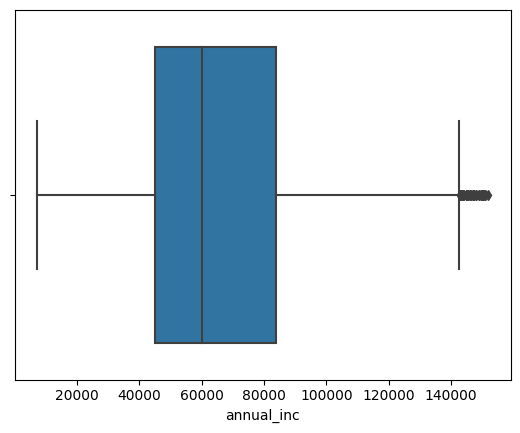

In [210]:
#Cheking the data distribution of the df_merged data for annual_inc
sns.boxplot(data = df_clean , x ="annual_inc")

It is showing a better distribution, with little noise

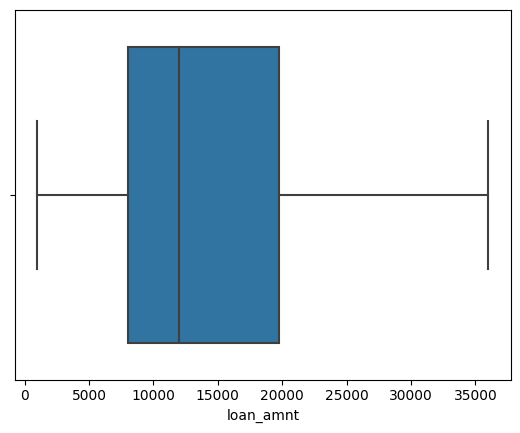

In [211]:
#Cheking the data distribution of the df_merged data for loan_amnt
loan_amnt_box = sns.boxplot(data = df_clean , x ="loan_amnt")

There are is not a single outlier detected

Clean data : df_clean

#TL SIMULATION 2

#D) EDA

In [212]:
#Preparing a copy of df_clean for EDA
df_eda = df_clean.copy()
df_eda.head()

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,2 years,45000.000,34.190,Not Verified,MORTGAGE,KY,South,B,rookies,Fully Paid,credit_card,INDIVIDUAL,2015-08-01,36 months,2000.000,69.930,15.610
1,218833,3 years,80000.000,22.430,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level,Fully Paid,credit_card,INDIVIDUAL,2010-04-01,36 months,15000.000,506.180,13.110
2,383111,3 years,50150.000,10.240,Not Verified,MORTGAGE,NE,Midwest,A,Mid-Level,Fully Paid,debt_consolidation,INDIVIDUAL,2013-06-01,36 months,10000.000,328.060,11.140
3,167468,8 years,79000.000,14.640,Verified,MORTGAGE,OR,West,A,Senior,Fully Paid,credit_card,INDIVIDUAL,2014-01-01,36 months,12000.000,398.520,11.990
4,337956,< 1 year,60000.000,25.420,Source Verified,RENT,WA,West,C,rookies,Charged Off,debt_consolidation,INDIVIDUAL,2015-04-01,60 months,22750.000,596.680,19.520


In [213]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8112 entries, 0 to 8471
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8112 non-null   object        
 1   emp_length            8112 non-null   object        
 2   annual_inc            8112 non-null   float64       
 3   income_expense_ratio  8112 non-null   float64       
 4   verification_status   8112 non-null   object        
 5   home_ownership        8112 non-null   object        
 6   state_code            8112 non-null   object        
 7   region                8112 non-null   object        
 8   grade                 8112 non-null   object        
 9   emp_experience        8112 non-null   object        
 10  loan_status           8112 non-null   object        
 11  purpose               8112 non-null   object        
 12  application_type      8112 non-null   object        
 13  issue_month       

##Descriptive statistics:
* How many users do we have in the data?
* How many users in each category of loan status?
* What is the common purpose for a loan?
* How many users applied for loans based on region?

### Descriptive information about numeric variable

In [214]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['annual_inc','income_expense_ratio','loan_amnt','installment','int_rate']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)

,annual_inc,income_expense_ratio,loan_amnt,installment,int_rate
count,8112.000,8112.000,8112.000,8112.000,8112.000
mean,66686.330,18.300,14167.460,430.430,14.280
std,28914.770,8.210,8098.450,239.700,4.560
min,7261.000,0.000,1000.000,31.110,5.320
25%,45000.000,12.240,8000.000,259.790,10.990
50%,60000.000,18.040,12000.000,380.840,13.990
75%,84000.000,23.980,19750.000,558.320,17.270
max,152000.000,59.260,36000.000,1451.140,29.990
kurtosis,0.100,-0.490,-0.040,0.860,-0.230
skewness,0.780,0.160,0.750,0.960,0.350


Insight
* Average **annual income** are 66686 usd, the median is 60000, minimum is 7261 and the maximum after removing outlier are 152000
* Looking at the **income_expense_ratio**, on average user spent 18% of their income for expenses, with minimum of 8% and the highest is 59%
* On average people get **loan** 14167 usd, the median is 12000 usd, the minimum is 1000 usd and the highes is 36000 usd after removing the outlier
* The average installment is 430 usd, the median is 381 usd, minimum is 31 usd and the maximum is 1451 usd
* The average interest rate is 14%, the minimum is 5% and the highest is 30%

###Descriptive information about string variable

In [215]:
objects = ['id',
 'emp_length',
 'verification_status',
 'home_ownership',
 'state_code',
 'region',
 'grade',
 'emp_experience',
 'loan_status',
 'purpose',
 'application_type',
 'term']
df_eda[objects].describe()

,id,emp_length,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,term
count,8112,8112,8112,8112,8112,8112,8112,8112,8112,8112,8112,8112
unique,8112,11,3,3,51,4,3,3,2,14,3,2
top,148271,10+ years,Source Verified,MORTGAGE,LA,South,B,Senior,Fully Paid,debt_consolidation,INDIVIDUAL,36 months
freq,1,2689,2847,3890,180,2763,3677,3910,4941,4952,8100,5825


**Insight**:
* we have 8112 **user**
* Most **emp_length** = 10+ year
* Most **verification status** = source verified
* Most **home ownership** = Mortgage
* Most user living in **LA**
* Most user living in **south region**
* Most user have **grade B**
* Most **emp_experience** is senior
* Most **loan status** = Fully Paid
* Most **purpose** is for debt consolidation
* Most **application type** = Individual
* Most **term** user use is 36 month

### Descriptive information about date type variable

In [216]:
df_eda['issue_month'].describe()

<ipython-input-216-874f515aa714>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['issue_month'].describe()


count                    8112
unique                    110
top       2014-10-01 00:00:00
freq                      322
first     2007-09-01 00:00:00
last      2016-12-01 00:00:00
Name: issue_month, dtype: object

Insight :
The date starts from 2007-09-01 to 2016-12-01

###Number of Customer

In [217]:
#Number of customer
df_eda['id'].count()

8112

Insight :
* We have 8112 user that taking loan from 2007 to 2016

###Loan Status

In [218]:
loan_status = df_eda.groupby('loan_status')['id'].count() #Count the id as users and group it by the loan status
loan_status = loan_status.reset_index()   #Reset the index to make it into a pandas dataframe
loan_status

,loan_status,id
0,Charged Off,3171
1,Fully Paid,4941


Here we are using pie Chart

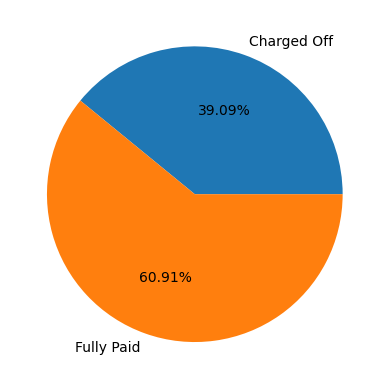

In [219]:
plt.pie(loan_status['id'], labels = loan_status['loan_status'], autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

**Insight :**
* Most user fully paid their with percentage of 61% from total user
* And the other 39% cannot pay their loan
* It is showing the high percentage of people cannot pay their loans back

###Purpose

In [220]:
df_purpose = df_eda.groupby(['purpose'])['id'].count()
df_purpose = df_purpose.reset_index()
df_purpose

,purpose,id
0,car,65
1,credit_card,1630
2,debt_consolidation,4952
3,educational,3
4,home_improvement,426
5,house,52
6,major_purchase,166
7,medical,90
8,moving,66
9,other,431


Here we are using horizontal bar chart

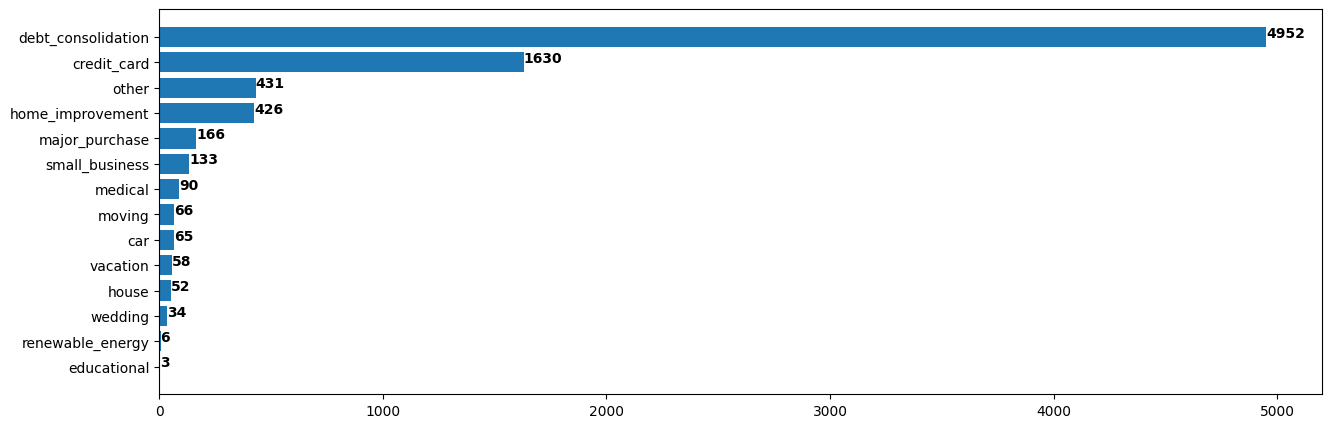

In [221]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = df_purpose.copy()

K.sort_values('id', ascending=True, inplace=True) #Sort the values descendingly
x = K['purpose']    #assign the x
y = K['id']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

Here we are using pareto chart

In [222]:
#We need to create frequency and percentage table
df_purpose.head()

,purpose,id
0,car,65
1,credit_card,1630
2,debt_consolidation,4952
3,educational,3
4,home_improvement,426


Since it is not sorted we need to sort it first

In [223]:
df_purpose = df_purpose.sort_values('id',ascending = False)  #Sort the values for cummulative percentage
df_purpose

,purpose,id
2,debt_consolidation,4952
1,credit_card,1630
9,other,431
4,home_improvement,426
6,major_purchase,166
11,small_business,133
7,medical,90
8,moving,66
0,car,65
12,vacation,58


Now we add percentage on the table

In [224]:
#add new cum_percentage column
df_purpose['cum_percentage'] = np.round(df_purpose['id'].cumsum()/df_purpose['id'].sum() * 100,2)   #add cumulative sum using .cumsum()
df_purpose

,purpose,id,cum_percentage
2,debt_consolidation,4952,61.050
1,credit_card,1630,81.140
9,other,431,86.450
4,home_improvement,426,91.700
6,major_purchase,166,93.750
11,small_business,133,95.390
7,medical,90,96.500
8,moving,66,97.310
0,car,65,98.110
12,vacation,58,98.830


Now we create the chart

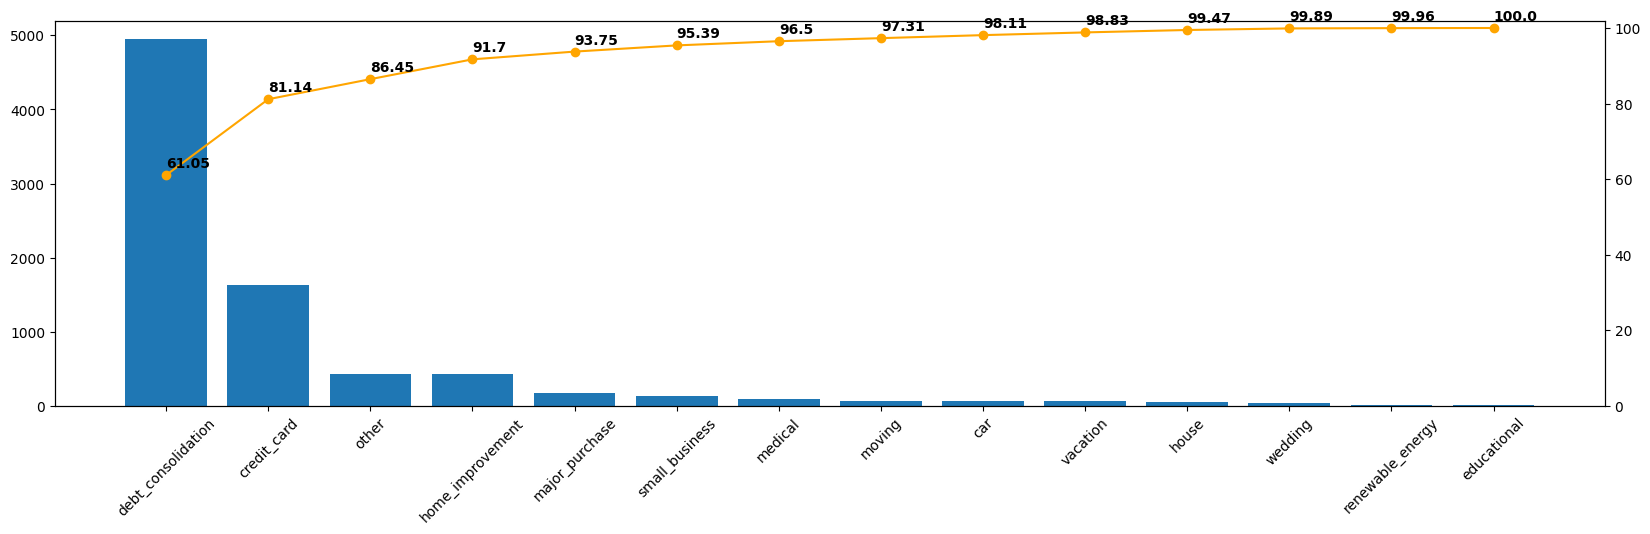

In [225]:
fig,ax = plt.subplots(figsize=(20, 5))    #To create sub plot

x = df_purpose['purpose']
y_bar = df_purpose['id']
y_line = df_purpose['cum_percentage']

ax.bar(x,y_bar)   #To create the bar chart

plt.xticks(rotation = 45)

ax2 = ax.twinx()     #To create combo chart, create twin axis of y, by sharing x axis
ax2.plot(x,y_line, marker = 'o', color = 'orange')   #To create the line chart
ax2.set_ylim(ymin=0)    #To make the line chart start at 0

#To create the data labels
for i, v in enumerate(y_line):
    vmil = round(v,2)
    plt.text(i, v+2, str(vmil), fontweight='bold')

plt.show()

**Insight :**
* We can see that most user which is aroung 61% of all users, using their loan for debt consolidation
* 81.14 percent of total customer getting a loan for debt_consolidation and credit card purposes

###Region

In [226]:
#Count the user based on the region
df_region = df_eda.groupby(['region'])['id'].count()
df_region = df_region.reset_index()
df_region

,region,id
0,Midwest,1912
1,Northeast,1409
2,South,2763
3,West,2028


Here we are using vertical bar chart

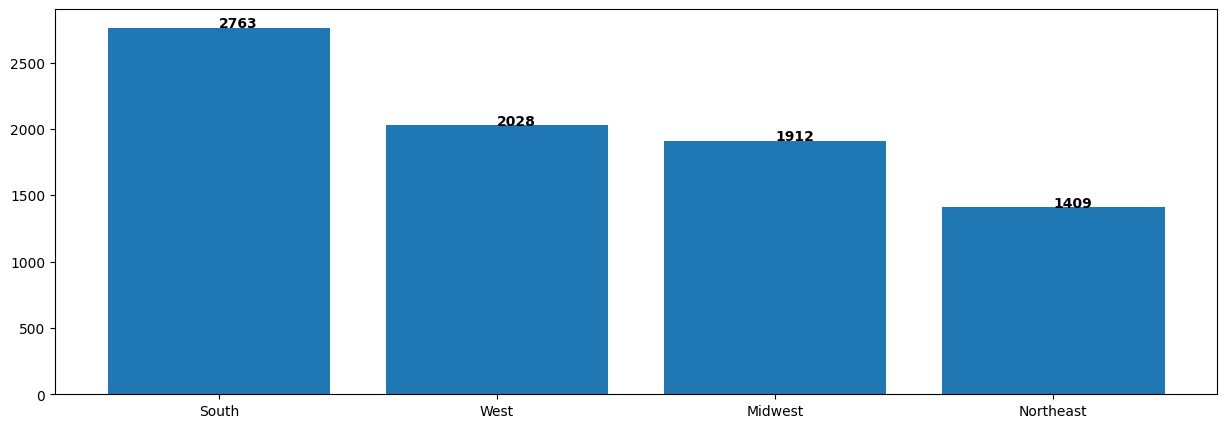

In [227]:
fig = plt.figure(figsize =(15, 5))

K = df_region.copy()

K.sort_values('id', ascending=False, inplace=True)
x = K['region']
y = K['id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

##Finding Pattern:
Visualize the dataset, and find a pattern on time-series data in the dataset
* Is there any trend on issued loans, monthly?
* How about monthly trends on issued loans based on purpose loans in the dataset

####Trend on monthly issued loan

#####Total amount usd loaned

In [228]:
loan_trend = df_eda[['issue_month','loan_amnt']]    #Choose the variable wee need to make the chart
loan_trend['year_month'] = loan_trend['issue_month'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data

loan_trend = loan_trend.sort_values('issue_month')  #Sort the values by the issue month, ascending
loan_trend = loan_trend.groupby('year_month').sum() #sum the data and group it by the year_month
loan_trend = loan_trend.reset_index()
loan_trend.head()

<ipython-input-228-b7040343910e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_trend['year_month'] = loan_trend['issue_month'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data
<ipython-input-228-b7040343910e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_trend = loan_trend.groupby('year_month').sum() #sum the data and group it by the year_month


,year_month,loan_amnt
0,2007/09,5000.000
1,2007/11,12000.000
2,2007/12,6500.000
3,2008/01,23000.000
4,2008/02,7000.000


######Line Chart

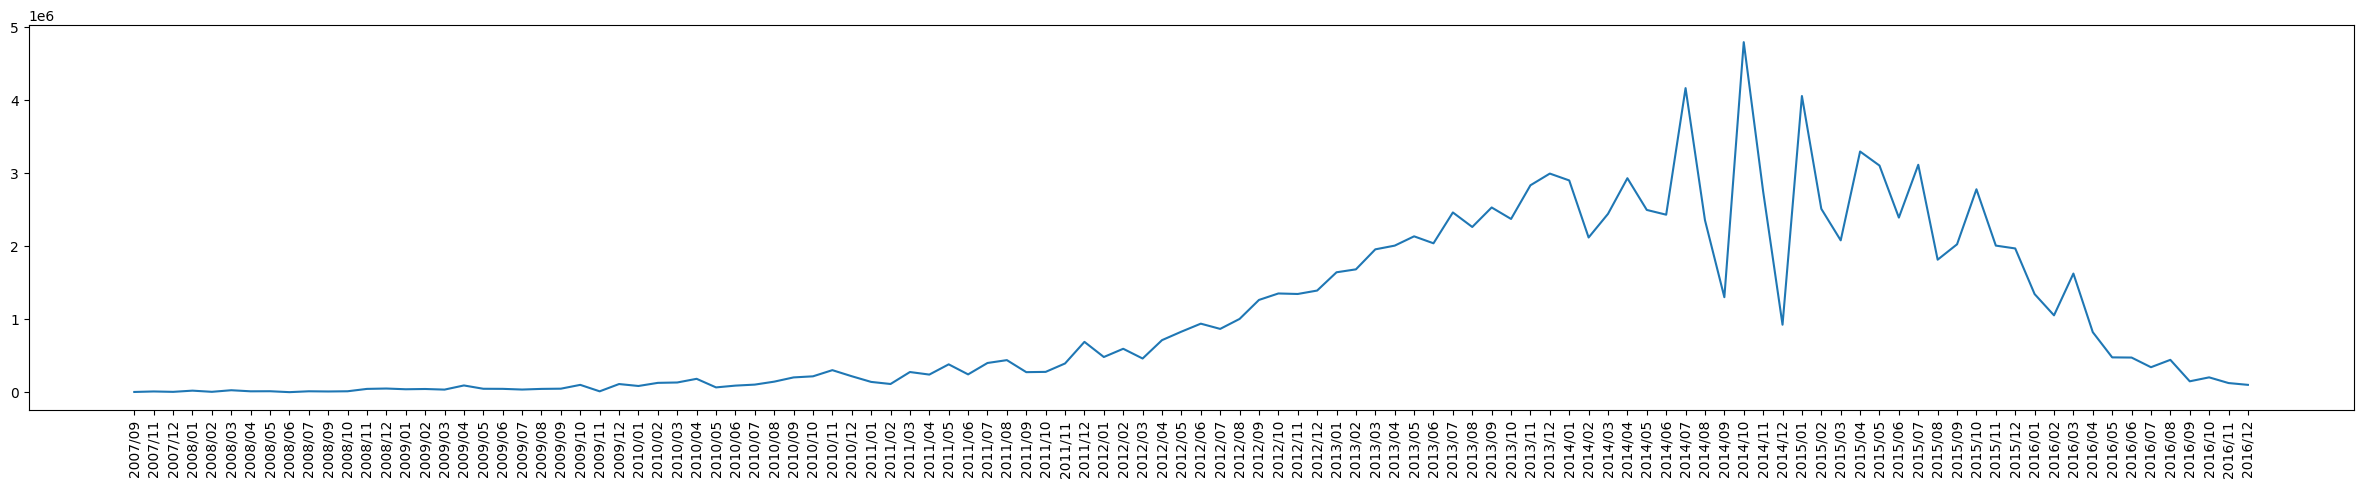

In [229]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(loan_trend['year_month'], loan_trend['loan_amnt'])

plt.show()

#####Total user getting a loan

In [230]:
u_loan_trend = df_eda[['issue_month','id']]    #Choose the variable wee need to make the chart
u_loan_trend['year_month'] = u_loan_trend['issue_month'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data

u_loan_trend = u_loan_trend.sort_values('issue_month')  #Sort the values by the issue month, ascending
u_loan_trend = u_loan_trend.groupby('year_month')['id'].count() #sum the data and group it by the year_month
u_loan_trend = u_loan_trend.reset_index()
u_loan_trend.head()

<ipython-input-230-580ee5e86b4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_loan_trend['year_month'] = u_loan_trend['issue_month'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data


,year_month,id
0,2007/09,1
1,2007/11,1
2,2007/12,1
3,2008/01,3
4,2008/02,1


######Line Chart

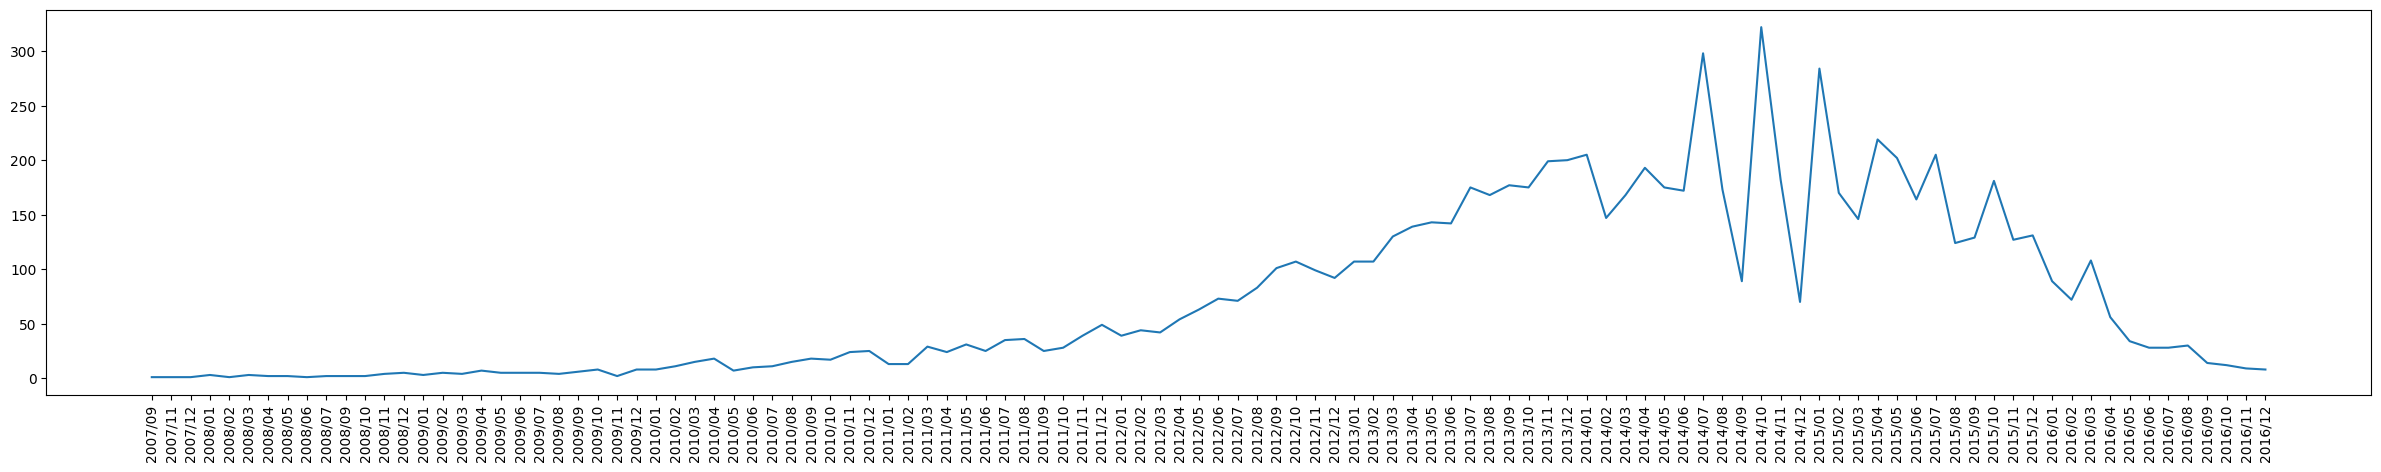

In [231]:
plt.figure(figsize =(30, 5))
plt.xticks(rotation = 90)
plt.plot(u_loan_trend['year_month'], u_loan_trend['id'])

plt.show()

#####**Insight**
**Amount USD**
* We can see that from 2007 to 2013 the issued loan are overall increasing
* And from 2014/05 the drop and increase are really steep and significat
* Until 2015/05 the data starts to show decrease overall by each month

**Number of User**
* The trend seems identical if we look at the number of user who get a loan
* so it probably that the amount of loan get loaned are directly caused by the number of user missing and appearing at that time

####Monthly trends on issued loans based on purpose loans in the dataset

#####Purpose by the amount usd

In [232]:
purpose_trend = df_eda[['purpose','issue_month','loan_amnt']]    #Pick variable that wanted to be analyzed
purpose_trend['issue_month'] = purpose_trend['issue_month'].dt.strftime('%Y/%m')    #Change the format into year/month
purpose_trend.head()

<ipython-input-232-fedcb1c667e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purpose_trend['issue_month'] = purpose_trend['issue_month'].dt.strftime('%Y/%m')    #Change the format into year/month


,purpose,issue_month,loan_amnt
0,credit_card,2015/08,2000.000
1,credit_card,2010/04,15000.000
2,debt_consolidation,2013/06,10000.000
3,credit_card,2014/01,12000.000
4,debt_consolidation,2015/04,22750.000


In [233]:
purpose_trend.info()    #Check the issue month data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8112 entries, 0 to 8471
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   purpose      8112 non-null   object 
 1   issue_month  8112 non-null   object 
 2   loan_amnt    8112 non-null   float64
dtypes: float64(1), object(2)
memory usage: 253.5+ KB


In [234]:
purpose_trend = purpose_trend[['issue_month','purpose','loan_amnt']]    #Change the column order for pivoting
purpose_trend.head(1)

,issue_month,purpose,loan_amnt
0,2015/08,credit_card,2000.000


In [235]:
#Change the purpose into a column using pivot
purpose_trend_pivot = purpose_trend.pivot_table(index = 'issue_month', columns='purpose', values = 'loan_amnt',aggfunc = 'sum') #Pivot the table and sum if there is a duplicate found
purpose_trend_pivot = purpose_trend_pivot.reset_index()
purpose_trend_pivot.head()

purpose,issue_month,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,2007/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000,NaN,NaN,NaN,NaN
1,2007/11,NaN,NaN,12000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007/12,NaN,NaN,6500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/01,11000.000,NaN,10000.000,NaN,NaN,NaN,NaN,NaN,NaN,2000.000,NaN,NaN,NaN,NaN
4,2008/02,NaN,NaN,7000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


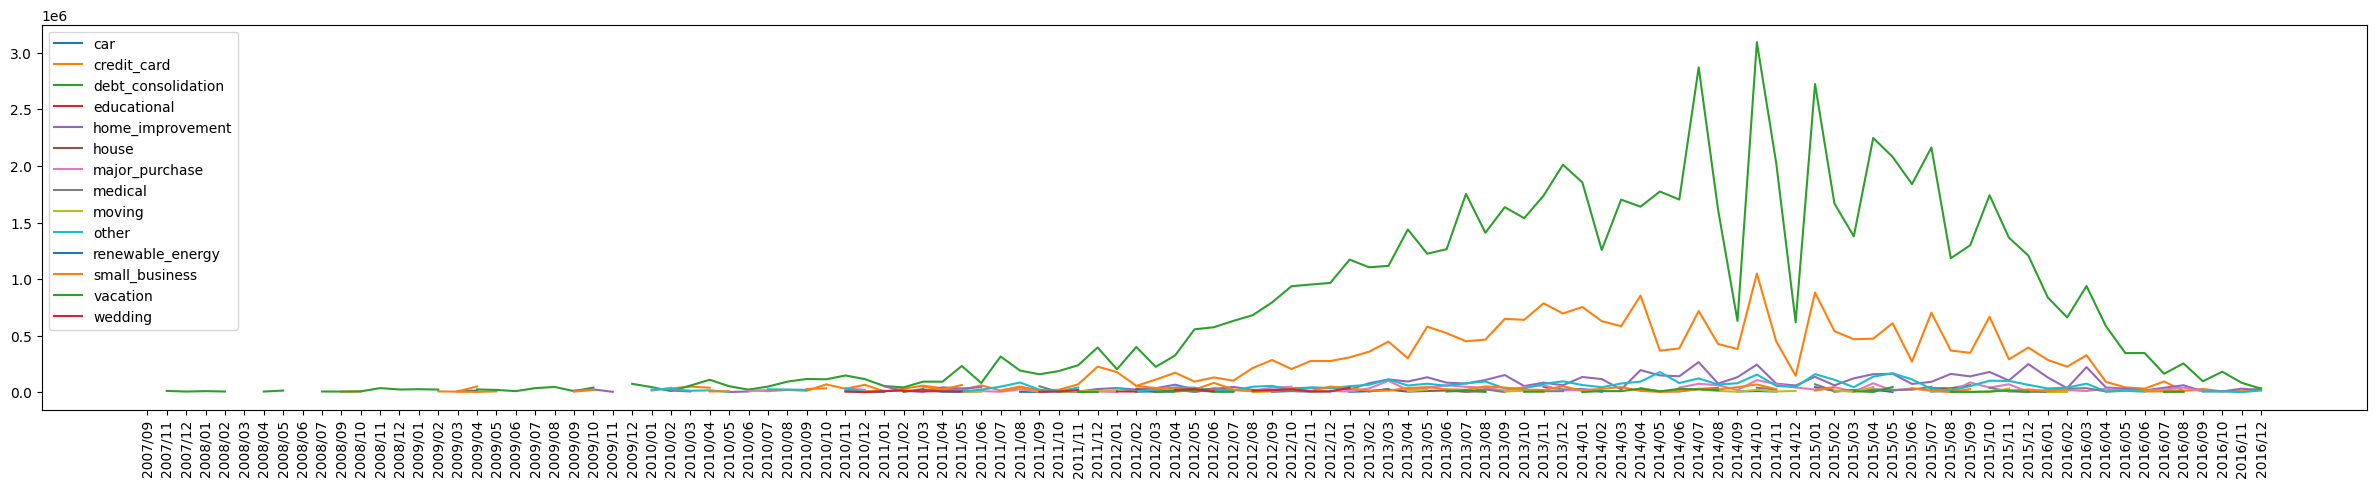

In [236]:
#Create line chart
plt.figure(figsize =(30, 5))
axis = purpose_trend_pivot.columns.tolist()
#axis.head()

for x in axis[1:]:
  plt.plot(purpose_trend_pivot['issue_month'], purpose_trend_pivot[x])

plt.xticks(rotation = 90)
plt.legend(purpose_trend_pivot.iloc[:,1:],loc = 2)

plt.show()

Recommendation:
* Since the categories are too diverse, and most users purposes are mostly for debt consolidation and credit card, we will narrow the analysis only for that
* And also since the movement are starting to arise from 2012, we also interested in analysing the data from 2012 onwards

In [237]:
#filter it into more than 12/01
df_purpose_fltr = purpose_trend_pivot[purpose_trend_pivot['issue_month'] >= '2012/01']
df_purpose_fltr.head()

purpose,issue_month,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
50,2012/01,NaN,178350.000,203550.000,NaN,37000.000,NaN,2000.000,NaN,18000.000,37300.000,NaN,NaN,NaN,7600.000
51,2012/02,5000.000,56500.000,400475.000,NaN,24000.000,29700.000,NaN,12000.000,NaN,9000.000,NaN,53850.000,NaN,6000.000
52,2012/03,7500.000,112275.000,224575.000,NaN,35600.000,2000.000,16000.000,NaN,NaN,23700.000,NaN,38475.000,3075.000,NaN
53,2012/04,4000.000,172500.000,325650.000,NaN,67175.000,20000.000,NaN,20000.000,3000.000,42750.000,NaN,26175.000,11600.000,22000.000
54,2012/05,NaN,94700.000,556350.000,NaN,25150.000,7350.000,2400.000,4000.000,25000.000,40625.000,4800.000,23500.000,19600.000,27600.000


######Line Chart

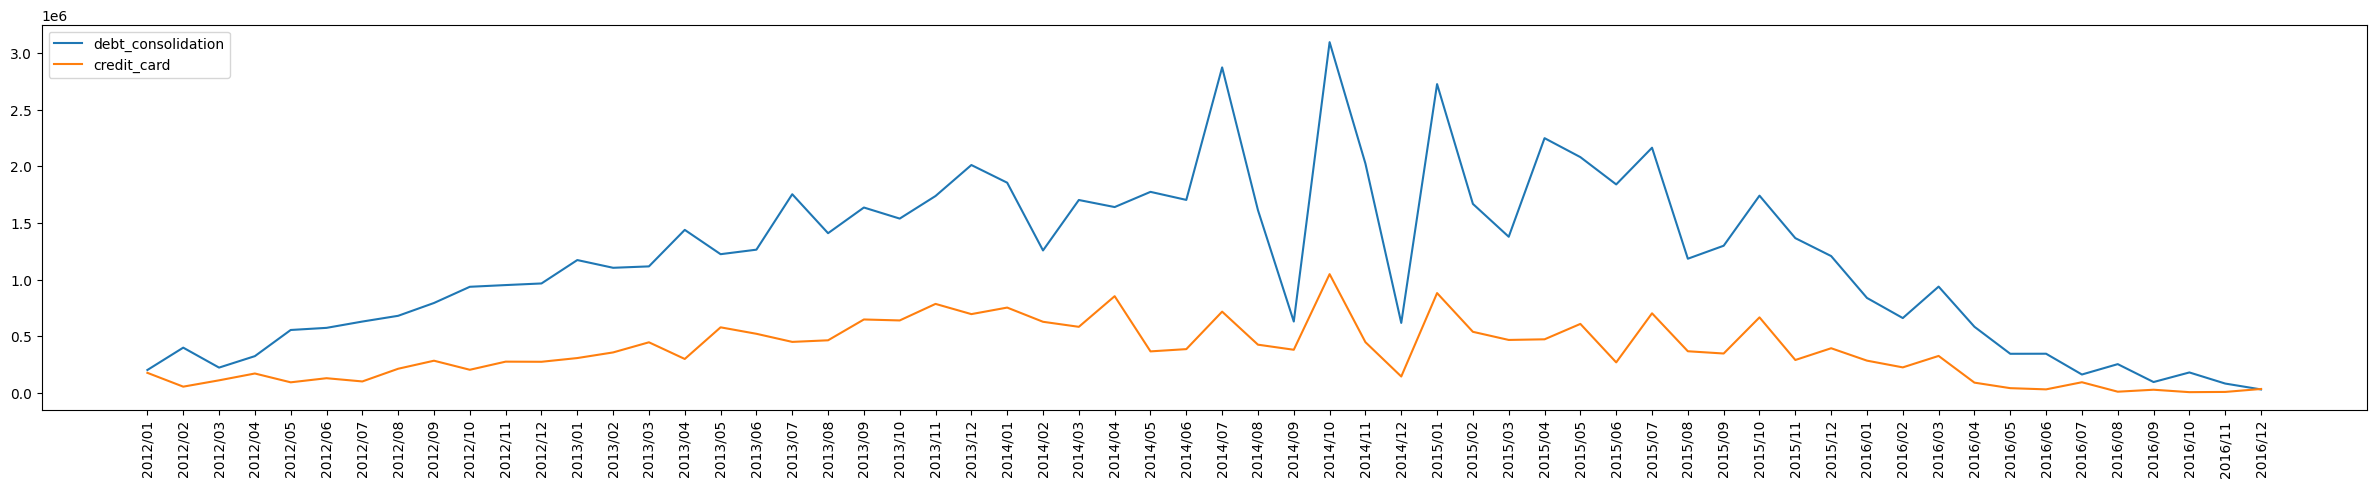

In [238]:
fig = plt.figure(figsize = (30,5))
axis = df_purpose_fltr[['debt_consolidation','credit_card']]
x = df_purpose_fltr['issue_month']
y = df_purpose_fltr[1:]

for x in axis[1:]:
  plt.plot(df_purpose_fltr['issue_month'], df_purpose_fltr[x])

plt.xticks(rotation = 90)
plt.legend(df_purpose_fltr[['debt_consolidation','credit_card']],loc = 2)

plt.show()

#####Purpose by the user

In [239]:
u_purpose_trend = df_eda[['purpose','issue_month','id']]    #Pick variable that wanted to be analyzed
u_purpose_trend['issue_month'] = u_purpose_trend['issue_month'].dt.strftime('%Y/%m')    #Change the format into year/month
u_purpose_trend.head()

<ipython-input-239-649db7240a5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_purpose_trend['issue_month'] = u_purpose_trend['issue_month'].dt.strftime('%Y/%m')    #Change the format into year/month


,purpose,issue_month,id
0,credit_card,2015/08,148271
1,credit_card,2010/04,218833
2,debt_consolidation,2013/06,383111
3,credit_card,2014/01,167468
4,debt_consolidation,2015/04,337956


In [240]:
u_purpose_trend.info()    #Check the issue month data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8112 entries, 0 to 8471
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   purpose      8112 non-null   object
 1   issue_month  8112 non-null   object
 2   id           8112 non-null   object
dtypes: object(3)
memory usage: 253.5+ KB


In [241]:
u_purpose_trend = u_purpose_trend[['issue_month','purpose','id']]    #Change the column order for pivoting
u_purpose_trend.head(1)

,issue_month,purpose,id
0,2015/08,credit_card,148271


In [242]:
#Change the purpose into a column using pivot
u_purpose_trend_pivot = u_purpose_trend.pivot_table(index = 'issue_month', columns='purpose', values = 'id',aggfunc = 'count') #Pivot the table and sum if there is a duplicate found
u_purpose_trend_pivot = u_purpose_trend_pivot.reset_index()
u_purpose_trend_pivot.head()

purpose,issue_month,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,2007/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN
1,2007/11,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007/12,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/01,1.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN
4,2008/02,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


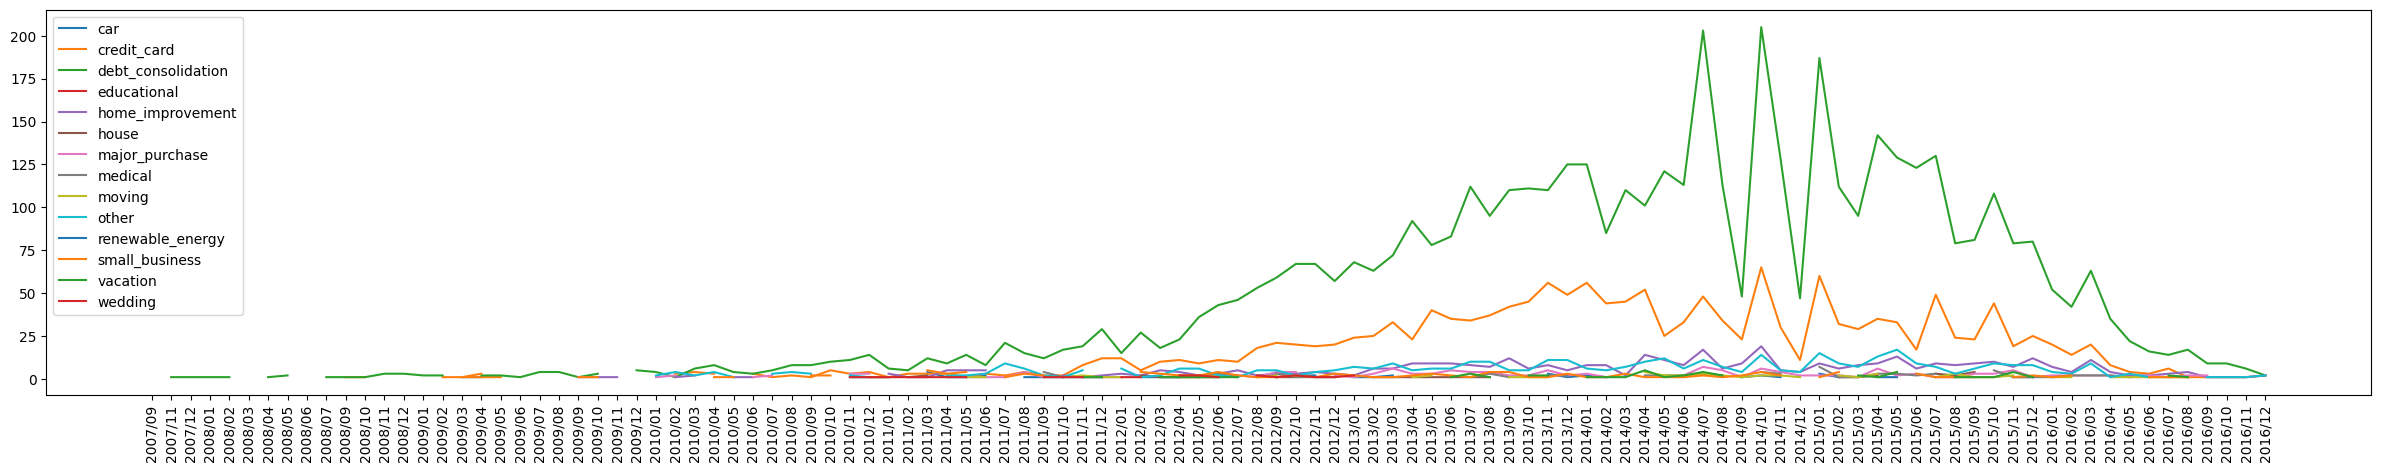

In [243]:
#Create line chart
plt.figure(figsize =(30, 5))
axis = u_purpose_trend_pivot.columns.tolist()
#axis.head()

for x in axis[1:]:    #
  plt.plot(u_purpose_trend_pivot['issue_month'], u_purpose_trend_pivot[x])

plt.xticks(rotation = 90)
plt.legend(u_purpose_trend_pivot.iloc[:,1:],loc = 2)

plt.show()

Recommendation:
* Since the categories are too diverse, and most users purposes are mostly for debt consolidation and credit card, we will narrow the analysis only for that
* And also since the movement are starting to arise from 2012, we also interested in analysing the data from 2012 onwards

In [244]:
#filter it into more than 12/01
u_purpose_fltr = u_purpose_trend_pivot[purpose_trend_pivot['issue_month'] >= '2012/01']
u_purpose_fltr.head()

purpose,issue_month,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
50,2012/01,NaN,12.000,15.000,NaN,3.000,NaN,1.000,NaN,1.000,6.000,NaN,NaN,NaN,1.000
51,2012/02,1.000,5.000,27.000,NaN,2.000,2.000,NaN,1.000,NaN,1.000,NaN,4.000,NaN,1.000
52,2012/03,1.000,10.000,18.000,NaN,5.000,1.000,1.000,NaN,NaN,2.000,NaN,3.000,1.000,NaN
53,2012/04,1.000,11.000,23.000,NaN,4.000,1.000,NaN,2.000,1.000,6.000,NaN,2.000,1.000,2.000
54,2012/05,NaN,9.000,36.000,NaN,2.000,1.000,1.000,1.000,1.000,6.000,1.000,2.000,1.000,2.000


######Line Chart

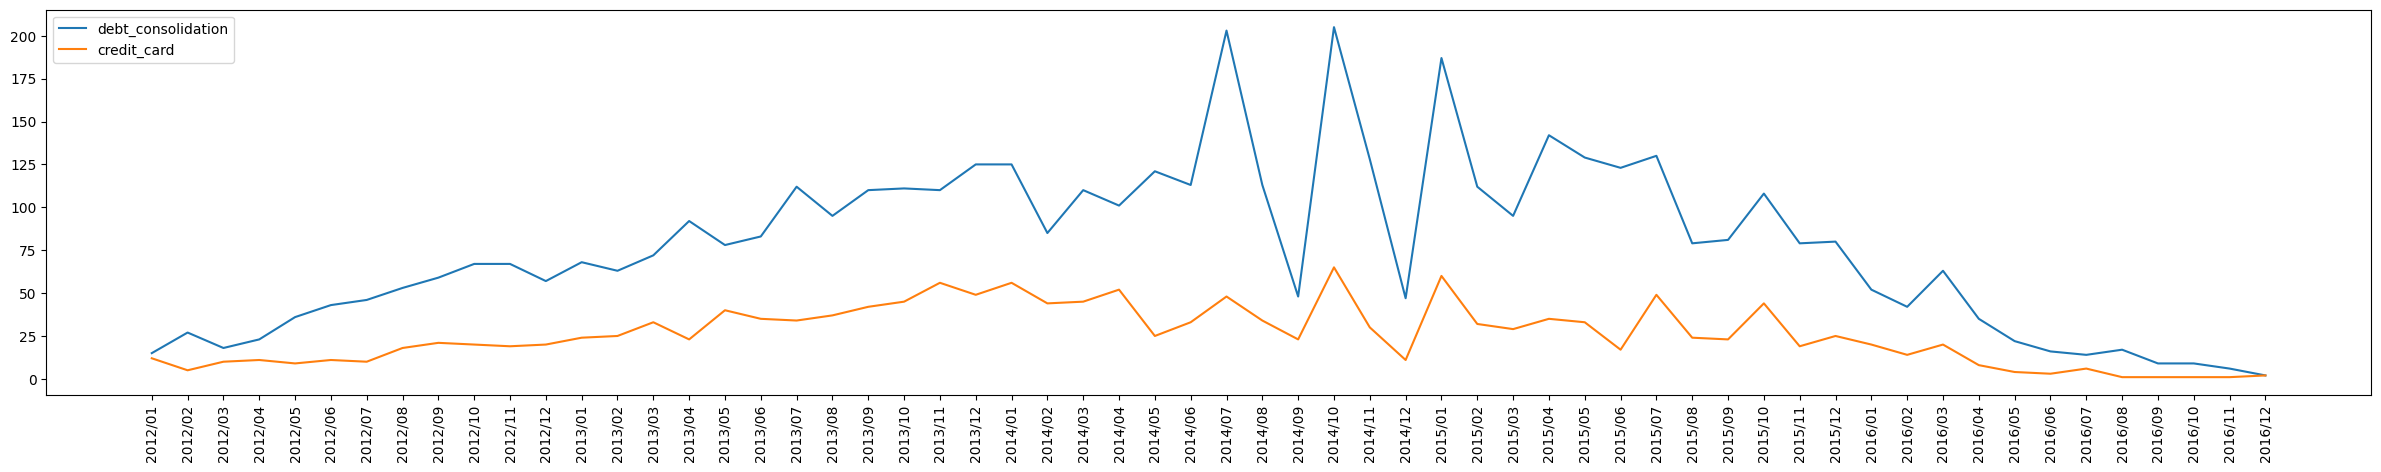

In [245]:
fig = plt.figure(figsize = (30,5))
axis = u_purpose_fltr[['debt_consolidation','credit_card']]
x = u_purpose_fltr['issue_month']
y = u_purpose_fltr[1:]

for x in axis[1:]:
  plt.plot(u_purpose_fltr['issue_month'], u_purpose_fltr[x])

plt.xticks(rotation = 90)
plt.legend(u_purpose_fltr[['debt_consolidation','credit_card']],loc = 2)

plt.show()

#####**Insight**
* By looking at the chart either from the amount of money loaned and the user showing similar trend
* For the debt_consolidation it shows suddent drop and increase of around 150 person every time the changes happens around 2014/04
* For the credit_card, the swing also can be seen but does not as appearing






#TL SIMULATION 3

#E) Segmentation

#### Data Preparation


In [246]:
#Make a copy of the clean data for segmentation
df_segmentation = df_clean.copy()
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8112 entries, 0 to 8471
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8112 non-null   object        
 1   emp_length            8112 non-null   object        
 2   annual_inc            8112 non-null   float64       
 3   income_expense_ratio  8112 non-null   float64       
 4   verification_status   8112 non-null   object        
 5   home_ownership        8112 non-null   object        
 6   state_code            8112 non-null   object        
 7   region                8112 non-null   object        
 8   grade                 8112 non-null   object        
 9   emp_experience        8112 non-null   object        
 10  loan_status           8112 non-null   object        
 11  purpose               8112 non-null   object        
 12  application_type      8112 non-null   object        
 13  issue_month       

Here we want to create our cluster using these feature :
* Annual Income
* Loan Amount

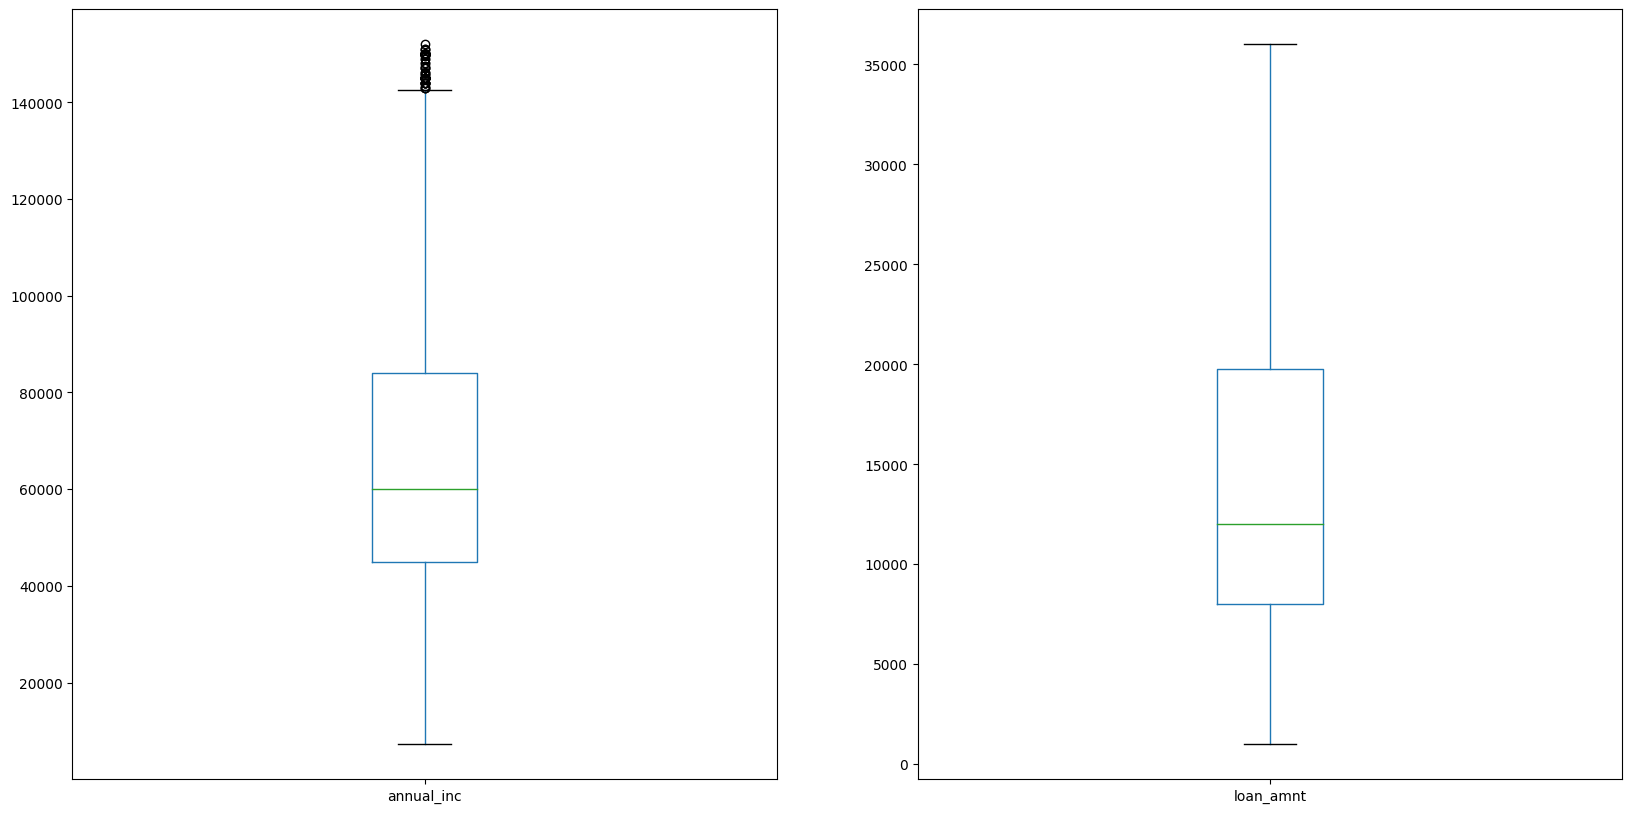

In [247]:
# filter numeric column
feature = ['annual_inc', 'loan_amnt']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_segmentation.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

####Libraries

In [248]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis

####Preparing annual income and loan amount

In [249]:
df_segmentation_feature = df_segmentation[['id','annual_inc', 'loan_amnt']]
df_segmentation_feature

,id,annual_inc,loan_amnt
0,148271,45000.000,2000.000
1,218833,80000.000,15000.000
2,383111,50150.000,10000.000
3,167468,79000.000,12000.000
4,337956,60000.000,22750.000
...,...,...,...
8467,54050,60000.000,8400.000
8468,87157,110000.000,7200.000
8469,289726,40000.000,11600.000
8470,91448,55000.000,12000.000


In [250]:
df_segmentation_feature.describe()

,annual_inc,loan_amnt
count,8112.000,8112.000
mean,66686.332,14167.465
std,28914.766,8098.452
min,7261.000,1000.000
25%,45000.000,8000.000
50%,60000.000,12000.000
75%,84000.000,19750.000
max,152000.000,36000.000


##Check Data Distribution

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

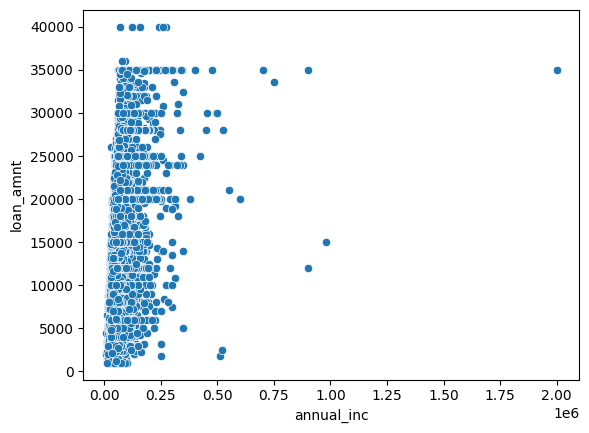

In [251]:
sns.scatterplot(data = df_merged, x='annual_inc', y='loan_amnt')

###No Scale

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

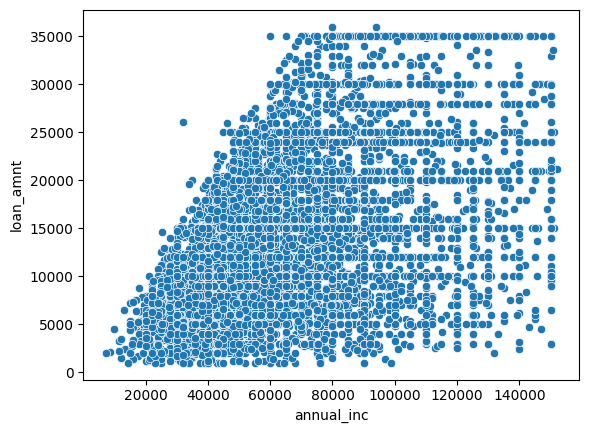

In [252]:
sns.scatterplot(data = df_segmentation_feature, x='annual_inc', y='loan_amnt')

###Standard Scaler

In [253]:
# Define Standard Scale dataset
ss_scale_df = df_segmentation_feature.copy()
column = ['annual_inc','loan_amnt']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

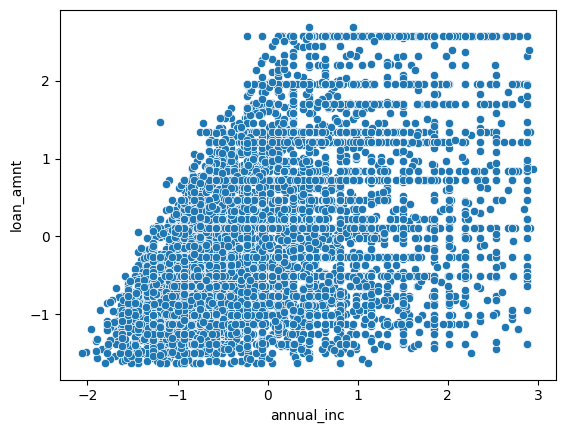

In [254]:
sns.scatterplot (data = ss_scale_df, x='annual_inc', y='loan_amnt')

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

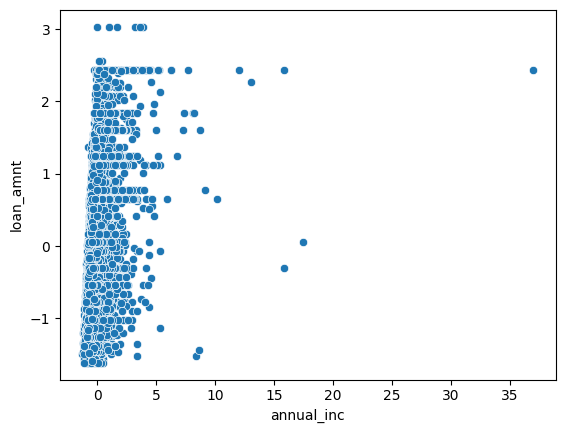

In [255]:
ss_scale_df1 = df_merged.copy()
column = ['annual_inc','loan_amnt']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df1[column] = ss_scaler.fit_transform(ss_scale_df1[column])

sns.scatterplot (data = ss_scale_df1, x='annual_inc', y='loan_amnt')

In [256]:
ss_scale_df[['annual_inc', 'loan_amnt']].head()

,annual_inc,loan_amnt
0,-0.750,-1.503
1,0.460,0.103
2,-0.572,-0.515
3,0.426,-0.268
4,-0.231,1.060


###Robust Scaler

In [257]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['annual_inc', 'loan_amnt']] = rs_scaler.fit_transform(rs_scale_df[['annual_inc', 'loan_amnt']])

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

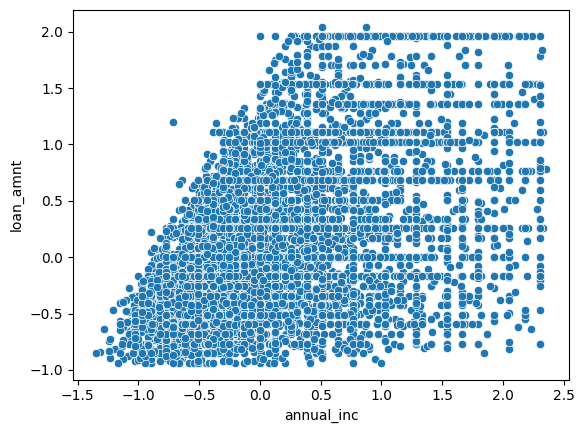

In [258]:
sns.scatterplot (data = rs_scale_df, x='annual_inc', y='loan_amnt')

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

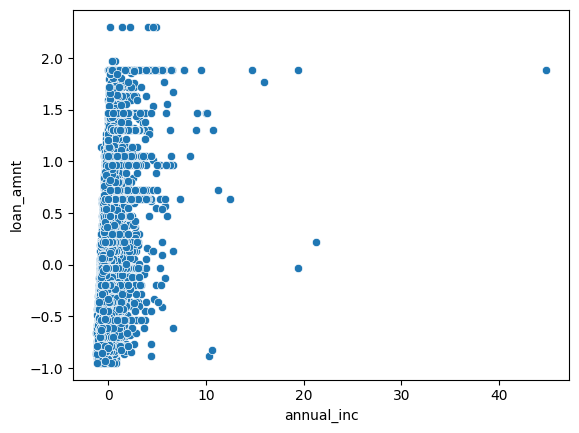

In [259]:
# Define Robust Scale dataset
rs_scale_df1 = df_merged.copy()
column = df_merged.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df1[['annual_inc', 'loan_amnt']] = rs_scaler.fit_transform(rs_scale_df1[['annual_inc', 'loan_amnt']])

sns.scatterplot (data = rs_scale_df1, x='annual_inc', y='loan_amnt')

In [260]:
df_merged.describe()

,annual_inc,income_expense_ratio,loan_amnt,installment,int_rate
count,8472.000,8472.000,8472.000,8472.000,8472.000
mean,73609.655,18.044,14555.037,442.154,14.250
std,52042.232,8.246,8389.476,249.723,4.585
min,7261.000,0.000,1000.000,31.110,5.320
25%,45000.000,11.870,8000.000,263.780,10.990
50%,62328.000,17.800,12375.000,387.150,13.980
75%,88212.500,23.763,20000.000,576.308,17.270
max,2000000.000,59.260,40000.000,1451.140,29.990


###MinMax Scaler

In [261]:
# Define Minmax Scale dataset
mm_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['annual_inc', 'loan_amnt']] = mm_scaler.fit_transform(mm_scale_df[['annual_inc', 'loan_amnt']])

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

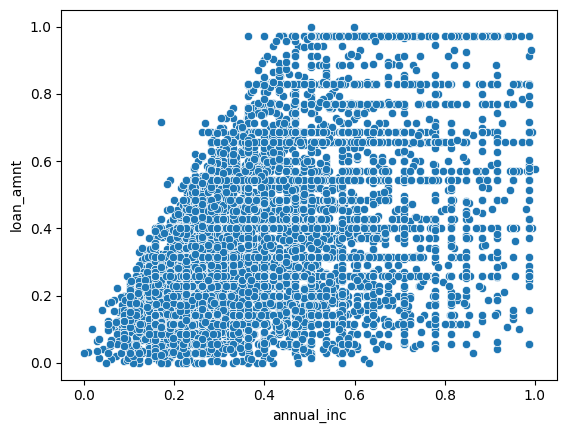

In [262]:
sns.scatterplot (data = mm_scale_df, x='annual_inc', y='loan_amnt')

##Cluster

###Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

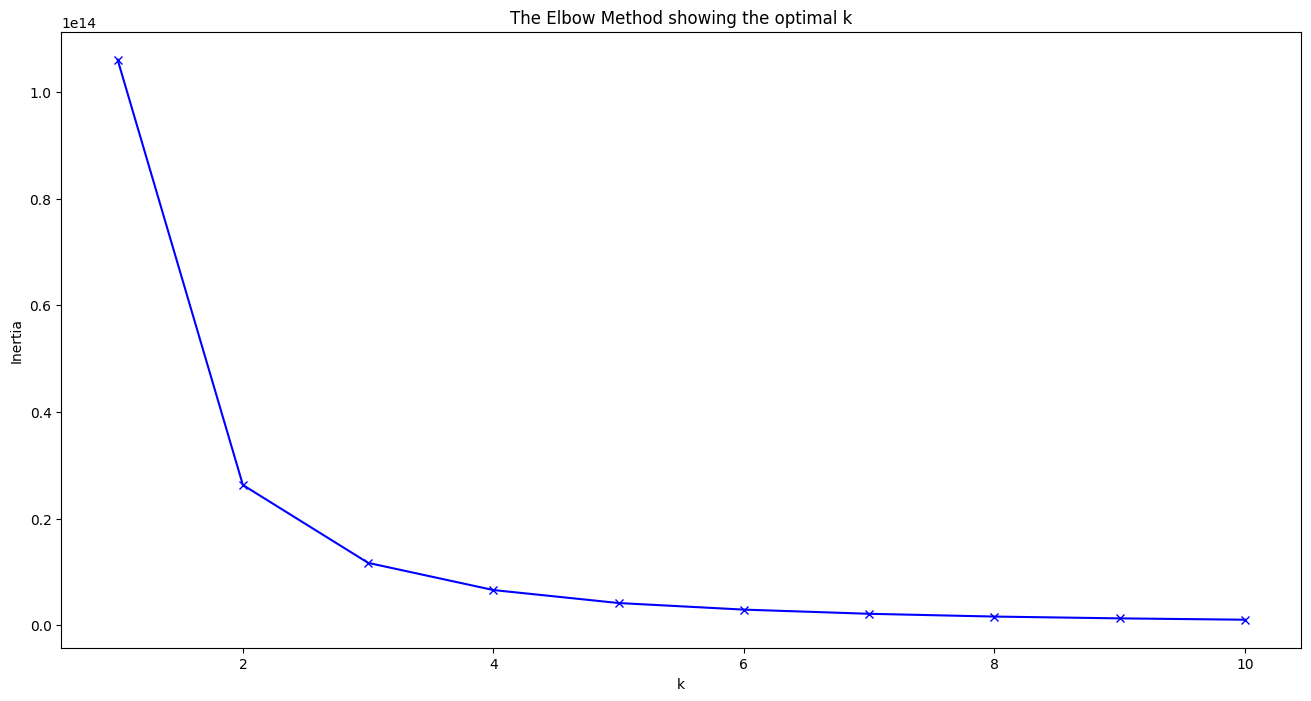

[106064557427578.92, 26319214807994.375, 11717829435607.148, 6621825812401.344, 4186663144155.115, 2954013291075.3486, 2170837516485.8613, 1650771386752.708, 1312740240912.2144, 1058781089480.8643]


In [263]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### silhouette analysis

In [264]:

# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [ ]:
silhoutte_analysis(ss_scale_df[['annual_inc', 'loan_amnt']],list(range(2,5)))                   #------Tinggal ganti di variablenya dan rangenya

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhoutte_analysis(df_merged[['annual_inc', 'loan_amnt']],list(range(2,5)))                   #------Tinggal ganti di variablenya dan rangenya

##Segmentation

With ss_scaler

Cluster 4

In [ ]:
# make cluster
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_4[['annual_inc', 'loan_amnt']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='annual_inc')

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='loan_amnt')

In [ ]:
# make cluster
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(Cluster_3[['annual_inc', 'loan_amnt']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

In [ ]:
# Number of transaction
sns.boxplot (data = Cluster_3 , x ='cluster' , y ='annual_inc')

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='loan_amnt')

##Merge Hasil cluster dengan dataset

In [ ]:
df_segmented = Cluster_4.merge(df_segmentation,how= 'inner', on = 'id')
df_segmented

##Visualize Cluster

For no we call our clusters as is, then we will create an interesting name for naming the cluster

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='annual_inc_y', y='loan_amnt_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='annual_inc_y', y='loan_amnt_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='annual_inc_y', y='loan_amnt_y', c='green', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='annual_inc_y', y='loan_amnt_y', c='yellow', label='Cluster 4', ax = cluster_scatter)

###Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['annual_inc_y','loan_amnt_y']].agg(['count','mean','min','max','median']).T


###Cluster Interpretation

To Check what can be analyzed

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

Things can be analyzed :
* Annual Income
* Loan amount
* Loan status
* emp_experience
* term
* installment
* grade
* region
* Purpose

####Annual Income

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['annual_inc_y'].mean()

Insight :
* 0 = Average annual income = 43.854 (Lowest)
* 1 = Average annual income = 104.736 (Highest)
* 2 = Average annual income = 96.152
* 3 = Average annual income = 60.529

####Loan Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['loan_amnt_y'].mean()

Insight :
* 0 = average loam amnt = 7.966 (Lowest)
* 1 = average loan amnt = 27.848 (Highest)
* 2 = average loan amnt = 10.470
* 3 = average loan amnt = 18.558

####Loan Status

In [ ]:
df_segmented.groupby(['cluster','loan_status'], as_index = False)['id'].count()

Insight :
* 0 = Fully Paid = 59.8%
* 1 = Fully Paid = 62.1%
* 2 = Fully Paid = 74.0%
* 3 = Fully Paid = 53.0%

####Interest Rate

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['int_rate'].mean()

Insight :
* 0 = average = 13.9%
* 1 = average = 15.2%
* 2 = average = 12.8%
* 3 = average = 15.4%

####Employer Experience

In [ ]:
df_segmented.groupby(['cluster','emp_experience'], as_index = False)['id'].count()

Insight :
* 0 = Senior, Rookies, Mid-Level
* 1 = Senior, Mid-Level, Rookies
* 2 = Senior, Mid-Level, Rookies
* 3 = Senior, Mid-Level, Rookies

####Term

In [ ]:
df_segmented.groupby(['cluster','term'], as_index = False)['id'].count()

Insight :
* 0 = most is 36month by 87%
* 1 = most is 36 month by 50%
* 2 = most is 36 month by 84%
* 3 = most is 36 month by 51%

####Installment

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['installment'].mean()

Insight :
* Average installment order from highest = 1,3,2,0

####Grade

In [ ]:
df_segmented.groupby(['cluster','grade'], as_index = False)['id'].count()

Insight :
* 0 = B,A,C
* 1 = B,A,C
* 2 = A,B,C
* 3 = B,A,C

####Region

In [ ]:
df_segmented.groupby(['cluster','region'], as_index = False)['id'].count()

Insight :
* 0 = south, west, midwest, northeast
* 1 = south, midwest, west, northeast
* 2 = South, west, Midwest, northeast
* 3 = Soth, west, Midwest, northeast

####Purpose

In [ ]:
df_segmented.groupby(['cluster','purpose'], as_index = False)['id'].count().sort_values(['cluster','id'])


###PPT

Insight :
* All of the cluster most used purpose is debt consolidation then credit card


Link to Segmentation :
https://docs.google.com/presentation/d/1ecP5PCbsGbdGD2sjdfiP3wi0hLIXvw18/edit?usp=share_link&ouid=102135432796521152623&rtpof=true&sd=true